# **[PUBG Finish Placement Prediction](https://www.kaggle.com/competitions/pubg-finish-placement-prediction/overview)**
- Can you predict the battle royale finish of PUBG Players?

## 데이터 분석 **<span style="color: #B8860B">문제 정의</span>**

- <span style="color: #0000FF">이슈 파악 및 문제 도출</span>
> - PUBG 게임을 통해 집계된 아래 통계 데이터를 확인하고, **최종 게임 내 통계 및 초기 플레이어 등급에서 최종 배치를 예측.**
- <span style="color: #0000FF">분석 데이터 정의</span>
> - PUBG 게임에 대해 PUBG Developer API를 통해 수집된 데이터
- <span style="color: #0000FF">머신러닝 문제 정의</span>
> - <u>1(1위)에서 0(최후)까지의 척도로 최종 통계를 기반</u>으로 **선수의 최종 순위를 예측하는 모델을 찾는 것이 목표**
> - 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 최적의 Regression Model을 사용하고자 함.
- <span style="color: #0000FF">BaseLine 선정</span>
> - <span style="color: #20B2AA">Data 관련</span>
>    - <span style="color: #FA8072">결측치</span>는 모두 제거
>    - <span style="color: #FA8072">Data Leakage와 연관된 column</span> 제거
>    - <span style="color: #FA8072">Objective, Categorical type의 columns</span>은 모두 제거
> - <span style="color: #20B2AA">Modeling 관련</span>
>    - <span style="color: #FA8072">BaseModel은 xgboostRegressor</span>로 선정
>    - 'target'을 제외한 모든 columns에 대한 학습 진행

## 데이터 **<span style="color: #B8860B">수집 및 확인</span>**

- **Data** : Kaggle에서 제공하는 데이터를 사용 예정
>- train_V2.csv
>- test_V2.csv  
>- sample_submission_V2.csv  
      
- **Data fileds**

>|컬럼명|설명|
|:---|:---|
|**Id**|플레이어 아이디|
|**groupId**|경기 내에서 그룹을 식별하기 위한 ID입니다.<br>같은 그룹의 플레이어가 다른 경기에서 플레이하는 경우 매번 다른 groupId를 갖습니다.|
|**matchId**|경기를 식별하는 ID입니다.<br> train set과 test set에 모두 있는 경기는 없습니다.|
|**assists**|이 플레이어가 피해를 입힌 적 플레이어 중 동료에게 살해된 플레이어 수입니다.|
|**boosts**|사용된 부스트 아이템의 수입니다.|
|**DamageDealt**|가한 총 피해량입니다.<br>참고: 자신이 입힌 피해는 차감됩니다. 팀 합산|
|**DBNO**|다운이된 상 플레이어의 수입니다.<br>'Down But No Out'의 약자입니다. 듀오나 스쿼드 플레이 중 체력(HP)을 모두 잃으면 이 모드로 진입합니다.<br>duo 혹은 sqaud 모드에서 타인을 치유할 수 있으며 이것이 아웃으로 간주하지 않는 이유입니다.<br>'Revive State'는 BATTLEGROUNDS의 기능으로 쓰러진 분대원을 소생시키는 데 사용할 수 있습니다.<br>HP가 0이 되면 DBNO 상태가 됩니다.<br>아이템을 크롤링 및 드롭할 수만 있으며 이 상태에서는 아이템을 쏘거나 사용할 수 없습니다.|
|**headshotKills**|헤드샷으로 사망한 적 플레이어의 수입니다.|
|**heals**|사용된 치유 아이템의 수입니다.<br>PUBG에는 붕대, 응급 처치 키트 및 의료 키트의 세 가지 기본 heals 옵션이 있습니다.|
|**killPlace**|해당 경기 내에서 죽인 적 플레이어 전체 수에 대한 순위입니다.|
|**killPoints**|플레이어의 킬 기반 외부 순위입니다.<br>오로지 킬만 중요한 Elo 랭킹이라고 생각하시면 됩니다.<br>rankPoints에 -1 이외의 값이 있는 경우 killPoints의 0은 "없음"으로 처리되어야 합니다.|
|**kills**|죽인 적 플레이어의 수.|
|**killStreaks**|짧은 시간에 죽인 적 플레이어의 최대 수입니다.|
|**longKill**|사망 시점에 사망한 플레이어와 플레이어 사이의 최장 거리입니다.<br>플레이어를 쓰러뜨리고 drive away하면 가장 긴 킬 통계가 나올 수 있으므로 이는 오해의 소지가 있습니다.|
|**matchDuration**|경기 시간(초)입니다.|
|**matchType**|데이터의 출처인 게임 모드를 식별하는 문자열입니다.<br>표준 모드는 "solo", "duo", "squad", "solo-fpp", "duo-fpp" 및 "squad-fpp"입니다.<br>다른 모드는 이벤트 또는 사용자 모드에서 가져온 것입니다.|
|**maxPlace**|경기에서 데이터가 있는 배치의 최대 수입니다.<br>데이터가 배치를 건너뛰는 경우가 있으므로 numGroups와 일치하지 않을 수 있습니다.|
|**numGroups**|경기에서 데이터가 있는 그룹의 수입니다.|
|**rankPoints** |Elo 같은 플레이어의 순위입니다.<br>이 순위는 일관성이 없으며 API의 다음 버전에서 더 이상 사용되지 않으므로 주의해서 사용하십시오. <-1> 값은 순위가 "없음"을 의미합니다.|
|**revives**|이 플레이어가 팀원을 소생시킨 횟수입니다.|
|**rideDistance**|미터로 측정한 차량의 총 이동 거리입니다.|
|**roadKills**|차량에 있는 동안 킬 수입니다.|
|**swimDistance**|미터로 측정한 수영으로 이동한 총 거리.|
|**teamKills**|이 플레이어가 팀원을 죽인 횟수입니다.|
|**vehicleDestroys**|파괴된 차량의 수입니다.|
|**walkDistance**|미터로 측정한 도보로 이동한 총 거리.|
|**weaponsAcquired**|획득한 무기의 수입니다.|
|**winPoints**|승리 기반 플레이어의 외부 순위입니다.<br>오직 승리만이 중요한 Elo 랭킹이라고 생각하면 됩니다.<br>rankPoints에 -1 이외의 값이 있는 경우 winPoints의 0은 "없음"으로 처리되어야 합니다.|
|**winPlacePerc**|예측 대상입니다.<br>이것은 백분위수 승리 배치로, 1은 1위, 0은 경기의 마지막 순위에 해당합니다.<br>이 값은 numGroups가 아닌 maxPlace에서 계산되므로 일치 항목에 누락된 청크가 있을 수 있습니다.|


## **<span style="color: #B8860B">EDA</span>**

### 데이터 <span style="color: #20B2AA">로드</span>

In [1]:
import pandas as pd
import numpy as np

# show progress-bar
from tqdm import trange, notebook

#시각화
import matplotlib.pyplot as plt
import matplotlib.gridspec as grs
import matplotlib.ticker as tkr
import seaborn as sns

import calendar

# Report
import pandas_profiling
from IPython.display import display, HTML

# WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected = True)

# VIF 지표 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 경고메세지 무시
import warnings

warnings.filterwarnings(action='ignore')
# 'default' : 경고메세지 출력


In [2]:
base_path = '../../Machine-Running_LJW/Group Project/'

train = pd.read_csv(base_path + 'train_V2.csv')

# DataFrame 출력 시 최대 행 수 지정
# pd.set_option('display.max_rows',None)   

# DataFrame 출력 시 최대 열수 지정
pd.set_option('display.max_columns',100)   

train

Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
...                 ...             ...             ...      ...     ...   
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
0               0.00      0              0      0         60        1241   
1              91.47      0              0      0         57           0   
2              68.00      0              0      0         47           0   
3              32.90      0              0      0         75           0   
4             100.00      0              0      0         45           0   
...              ...    ...            ...    ...        ...         ...   
4446961         0.00      0              0      0         74        1029   
4446962        44.15      0              0      0         69           0   
4446963        59.06      0              0      0         66           0   
4446964       180.40      1              1      2         11           0   
4446965       268.00      0              0      1         18           0   

         kills  killStreaks  longestKill  matchDuration  matchType  maxPlace  \
0            0            0         0.00           1306  squad-fpp        28   
1            0            0         0.00           1777  squad-fpp        26   
2            0            0         0.00           1318        duo        50   
3            0            0         0.00           1436  squad-fpp        31   
4            1            1        58.53           1424   solo-fpp        97   
...        ...          ...          ...            ...        ...       ...   
4446961      0            0         0.00           1873  squad-fpp        29   
4446962      0            0         0.00           1435       solo        93   
4446963      0            0         0.00           1321  squad-fpp        28   
4446964      2            1        98.50           1373  squad-fpp        26   
4446965      2            1        78.25           1766   solo-fpp        98   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
0               26          -1        0        0.0000          0   
1               25        1484        0        0.0045          0   
2               47        1491        0        0.0000          0   
3               30        1408        0        0.0000          0   
4               95        1560        0        0.0000          0   
...            ...         ...      ...           ...        ...   
4446961         28          -1        0     1292.0000          0   
4446962         93        1501        0        0.0000          0   
4446963         28        1500        0        0.0000          0   
4446964         25        1418        2        0.0000          0   
4446965         94        1590        0     1369.0000          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
0               0.000          0                0        244.80   
1              11.040          0                0       1434.00   
2               0.000          0                0        161.80   
3               0.000          0                0        202.70   
4               0.000          0                0         49.75   
...            

In [3]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [4]:
train = reduce_mem_usage(train)
train

Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
...                 ...             ...             ...      ...     ...   
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
0            0.00000      0              0      0         60        1241   
1           91.50000      0              0      0         57           0   
2           68.00000      0              0      0         47           0   
3           32.90625      0              0      0         75           0   
4          100.00000      0              0      0         45           0   
...              ...    ...            ...    ...        ...         ...   
4446961      0.00000      0              0      0         74        1029   
4446962     44.15625      0              0      0         69           0   
4446963     59.06250      0              0      0         66           0   
4446964    180.37500      1              1      2         11           0   
4446965    268.00000      0              0      1         18           0   

         kills  killStreaks  longestKill  matchDuration  matchType  maxPlace  \
0            0            0      0.00000           1306  squad-fpp        28   
1            0            0      0.00000           1777  squad-fpp        26   
2            0            0      0.00000           1318        duo        50   
3            0            0      0.00000           1436  squad-fpp        31   
4            1            1     58.53125           1424   solo-fpp        97   
...        ...          ...          ...            ...        ...       ...   
4446961      0            0      0.00000           1873  squad-fpp        29   
4446962      0            0      0.00000           1435       solo        93   
4446963      0            0      0.00000           1321  squad-fpp        28   
4446964      2            1     98.50000           1373  squad-fpp        26   
4446965      2            1     78.25000           1766   solo-fpp        98   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
0               26          -1        0      0.000000          0   
1               25        1484        0      0.004501          0   
2               47        1491        0      0.000000          0   
3               30        1408        0      0.000000          0   
4               95        1560        0      0.000000          0   
...            ...         ...      ...           ...        ...   
4446961         28          -1        0   1292.000000          0   
4446962         93        1501        0      0.000000          0   
4446963         28        1500        0      0.000000          0   
4446964         25        1418        2      0.000000          0   
4446965         94        1590        0   1369.000000          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
0            0.000000          0                0      244.7500   
1           11.039062          0                0     1434.0000   
2            0.000000          0                0      161.7500   
3            0.000000          0                0      202.7500   
4            0.000000          0                0       49.7500   
...            

### <span style="color: #20B2AA">기초 정보</span> 확인

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float16
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float16
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float16
 21  roadKills        int8   
 22  swimDistance     float16
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float16
 26  weaponsAcquired  int16  
 27  winPoints   

### <span style="color: #20B2AA">Data 기본 정리</span> 작업

1. 결측치는 모두 제거
2. Data Leakage와 연관된 **<span style="color: #008000">killPlace</span>** column 제거

In [6]:
# 결측치 제거
train = train.dropna()

# 'killPlace' column 제거
train = train.drop(columns='killPlace')

In [7]:
train.isnull().sum().sum()

0

### Data <span style="color: #20B2AA">Profiling</span>
> 데이터의 개략적인 내용을 살펴보기 위해 pandas profiling을 이용하였음.

In [8]:
# Profiling Report

# report = pandas_profiling.ProfileReport(train)
# display(report)

### <span style="color: #20B2AA">기초 통계</span> 확인

In [9]:
# 타입별 column 종류 분류

num_columns = train.select_dtypes(exclude=['object']).columns
obj_columns = train.select_dtypes('object').columns

print(f'▶ numerical columns = {num_columns} → 총 {len(num_columns)}개의 columns')
print(f'▶ objective columns = {obj_columns} → 총 {len(obj_columns)}개의 columns')

▶ numerical columns = Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object') → 총 24개의 columns
▶ objective columns = Index(['Id', 'groupId', 'matchId', 'matchType'], dtype='object') → 총 4개의 columns


In [10]:
# Numerical columns 데이터 관련 기초통계 확인

pd.options.display.float_format = '{:.4f}'.format

train.describe()

assists       boosts  damageDealt        DBNOs  headshotKills  \
count 4446965.0000 4446965.0000 4446965.0000 4446965.0000   4446965.0000   
mean        0.2338       1.1069          NaN       0.6579         0.2268   
std         0.5886       1.7158          NaN       1.1457         0.6022   
min         0.0000       0.0000       0.0000       0.0000         0.0000   
25%         0.0000       0.0000       0.0000       0.0000         0.0000   
50%         0.0000       0.0000      84.2500       0.0000         0.0000   
75%         0.0000       2.0000     186.0000       1.0000         0.0000   
max        22.0000      33.0000    6616.0000      53.0000        64.0000   

             heals   killPoints        kills  killStreaks  longestKill  \
count 4446965.0000 4446965.0000 4446965.0000 4446965.0000 4446965.0000   
mean        1.3701     505.0062       0.9248       0.5440          NaN   
std         2.6800     627.5049       1.5584       0.7110          NaN   
min         0.0000       0.0000       0.0000       0.0000       0.0000   
25%         0.0000       0.0000       0.0000       0.0000       0.0000   
50%         0.0000       0.0000       0.0000       0.0000       0.0000   
75%         2.0000    1172.0000       1.0000       1.0000      21.3125   
max        80.0000    2170.0000      72.0000      20.0000    1094.0000   

       matchDuration     maxPlace    numGroups   rankPoints      revives  \
count   4446965.0000 4446965.0000 4446965.0000 4446965.0000 4446965.0000   
mean       1579.5068      44.5047      43.0076     892.0103       0.1647   
std         258.7388      23.8281      23.2895     736.6478       0.4722   
min         133.0000       2.0000       1.0000      -1.0000       0.0000   
25%        1367.0000      28.0000      27.0000      -1.0000       0.0000   
50%        1438.0000      30.0000      30.0000    1443.0000       0.0000   
75%        1851.0000      49.0000      47.0000    1500.0000       0.0000   
max        2237.0000     100.0000     100.0000    5910.0000      39.0000   

       rideDistance    roadKills  swimDistance    teamKills  vehicleDestroys  \
count  4446965.0000 4446965.0000  4446965.0000 4446965.0000     4446965.0000   
mean            NaN       0.0035           NaN       0.0239           0.0079   
std             NaN       0.0734           NaN       0.1674           0.0926   
min          0.0000       0.0000        0.0000       0.0000           0.0000   
25%          0.0000       0.0000        0.0000       0.0000           0.0000   
50%          0.0000       0.0000        0.0000       0.0000           0.0000   
75%          0.1910       0.0000        0.0000       0.0000           0.0000   
max      40704.0000      18.0000     3824.0000      12.0000           5.0000   

       walkDistance  weaponsAcquired    winPoints  winPlacePerc  
count  4446965.0000     4446965.0000 4446965.0000  4446965.0000  
mean            NaN           3.6605     606.4603           NaN  
std             NaN           2.4565     739.7005        0.0000  
min          0.0000           0.0000       0.0000        0.0000  
25%        155.1250           2.0000       0.0000        0.2000  
50%        685.5000           3.0000       0.0000        0.4583  
75%       1976.0000           5.0000    1495.0000        0.7407  
max      25776.0000         236.0000    2013.0000        1.0000

In [11]:
# Non-Numerical columns 데이터 관련 기초통계 확인

train.describe(include=['O'])

Id         groupId         matchId  matchType
count          4446965         4446965         4446965    4446965
unique         4446965         2026744           47964         16
top     7f96b2f878858a  14d6b54cdec6bc  4b5db40aec4797  squad-fpp
freq                 1              74             100    1756186

In [12]:
# 상관계수 확인

corr = train.corr()
corr

assists  boosts  damageDealt   DBNOs  headshotKills   heals  \
assists           1.0000  0.3077       0.4067  0.3011         0.1983  0.2286   
boosts            0.3077  1.0000       0.5219  0.3589         0.3347  0.5359   
damageDealt       0.4067  0.5219       1.0000  0.7358         0.6134  0.3430   
DBNOs             0.3011  0.3589       0.7358  1.0000         0.4699  0.2655   
headshotKills     0.1983  0.3347       0.6134  0.4699         1.0000  0.1999   
heals             0.2286  0.5359       0.3430  0.2655         0.1999  1.0000   
killPoints        0.0391  0.0083       0.0499  0.0426         0.0240 -0.0026   
kills             0.3197  0.5020       0.8888  0.7078         0.6743  0.3118   
killStreaks       0.2435  0.4053       0.7036  0.6469         0.5129  0.2704   
longestKill       0.2614  0.4233       0.5638  0.4514         0.4473  0.2633   
matchDuration    -0.0195  0.0721      -0.0068 -0.0145        -0.0177  0.1089   
maxPlace         -0.1479 -0.0137      -0.0407 -0.2677         0.0092 -0.0648   
numGroups        -0.1468 -0.0129      -0.0401 -0.2658         0.0094 -0.0642   
rankPoints       -0.0164  0.0232      -0.0015 -0.0035         0.0051  0.0191   
revives           0.1983  0.2531       0.2570  0.3010         0.1501  0.2367   
rideDistance      0.1106  0.3289       0.1409  0.1025         0.0765  0.2975   
roadKills         0.0119  0.0351       0.0525  0.0361         0.0134  0.0246   
swimDistance      0.0234  0.1080       0.0367  0.0173         0.0285  0.0796   
teamKills         0.0061  0.0131       0.0155  0.0694         0.0087  0.0354   
vehicleDestroys   0.0579  0.0874       0.0812  0.0602         0.0392  0.0629   
walkDistance      0.2903  0.6401       0.3982  0.2847         0.2510  0.4303   
weaponsAcquired   0.2439  0.4066       0.3532  0.2182         0.2176  0.3091   
winPoints         0.0240 -0.0076       0.0178  0.0111         0.0050 -0.0110   
winPlacePerc      0.2994  0.6342       0.4405  0.2800         0.2777  0.4279   

                 killPoints   kills  killStreaks  longestKill  matchDuration  \
assists              0.0391  0.3197       0.2435       0.2614        -0.0195   
boosts               0.0083  0.5020       0.4053       0.4233         0.0721   
damageDealt          0.0499  0.8888       0.7036       0.5638        -0.0068   
DBNOs                0.0426  0.7078       0.6469       0.4514        -0.0145   
headshotKills        0.0240  0.6743       0.5129       0.4473        -0.0177   
heals               -0.0026  0.3118       0.2704       0.2633         0.1089   
killPoints           1.0000  0.0362       0.0371       0.0141        -0.0995   
kills                0.0362  1.0000       0.8025       0.6029        -0.0307   
killStreaks          0.0371  0.8025       1.0000       0.5151        -0.0346   
longestKill          0.0141  0.6029       0.5151       1.0000         0.0566   
matchDuration       -0.0995 -0.0307      -0.0346       0.0566         1.0000   
maxPlace            -0.0448 -0.0048      -0.0373      -0.0182         0.0447   
numGroups           -0.0424 -0.0041      -0.0361      -0.0177         0.0368   
rankPoints          -0.9756  0.0082       0.0034       0.0170         0.0880   
revives              0.0120  0.2533       0.2417       0.1701         0.0170   
rideDistance        -0.0293  0.1147       0.0984       0.1909         0.3652   
roadKills           -0.0042  0.0637       0.0656       0.0252         0.0200   
swimDistance        -0.0046  0.0391       0.0346       0.0535         0.0087   
teamKills           -0.0397  0.0176       0.0276       0.0076         0.0480   
vehicleDestroys     -0.0097  0.0800       0.0644       0.0832         0.0609   
walkDistance         0.0046  0.3748       0.3276       0.4138         0.1451   
weaponsAcquired     -0.0040  0.3364       0.2754       0.2763         0.1291   
winPoints            0.9834  0.0069       0.0086      -0.0037        -0.0874   
winPlacePerc         0.0129  0.4199       0.3776       0.4102        -0.0052   

               

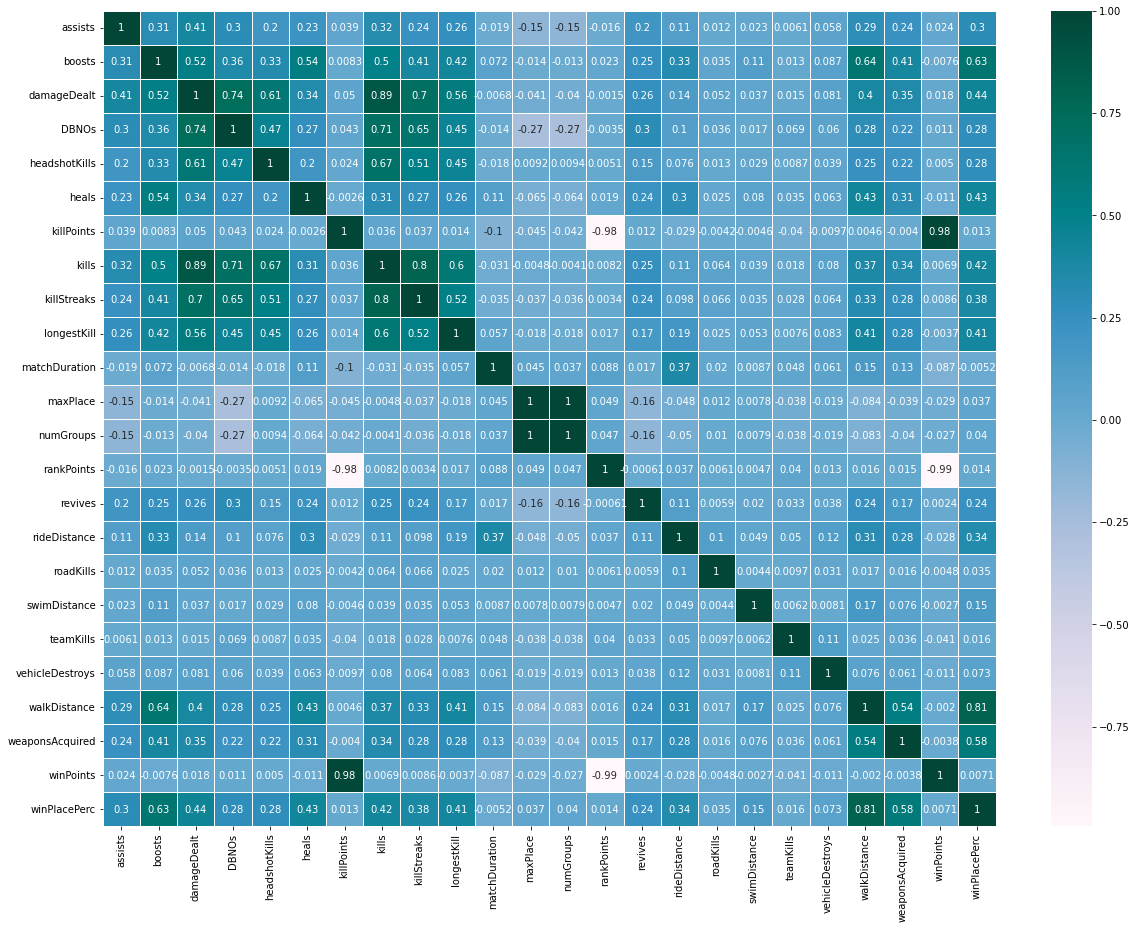

In [13]:
# numerical columns 간의 상관계수 확인

plt.subplots(figsize=(20, 15))
sns.heatmap(corr, annot=True, linewidths=1, cmap='PuBuGn')
plt.show()

In [14]:
# 'winPlacePerc' columns와의 상관계수 확인

corr_w = corr['winPlacePerc'].sort_values(ascending = False)
corr_w.to_frame().drop(['winPlacePerc'])

winPlacePerc
walkDistance           0.8109
boosts                 0.6342
weaponsAcquired        0.5838
damageDealt            0.4405
heals                  0.4279
kills                  0.4199
longestKill            0.4102
killStreaks            0.3776
rideDistance           0.3429
assists                0.2994
DBNOs                  0.2800
headshotKills          0.2777
revives                0.2409
swimDistance           0.1496
vehicleDestroys        0.0734
numGroups              0.0396
maxPlace               0.0374
roadKills              0.0345
teamKills              0.0159
rankPoints             0.0135
killPoints             0.0129
winPoints              0.0071
matchDuration         -0.0052

In [16]:
# Numerical columns 간의 VIF 지표 확인

pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(train[num_columns[:-1]].values, idx) for idx in range(train[num_columns[:-1]].shape[1])],
    "features": num_columns[:-1],
    })

VIF Factor         features
0       1.4924          assists
1       3.2893           boosts
2       9.6631      damageDealt
3       3.7427            DBNOs
4       2.1277    headshotKills
5       1.8816            heals
6      53.1008       killPoints
7      10.9115            kills
8       4.7425      killStreaks
9       2.0717      longestKill
10     41.0424    matchDuration
11   1093.7659         maxPlace
12   1070.8942        numGroups
13     27.6472       rankPoints
14      1.3104          revives
15      1.5725     rideDistance
16      1.0219        roadKills
17      1.0546     swimDistance
18      1.0468        teamKills
19      1.0415  vehicleDestroys
20      4.2804     walkDistance
21      4.8945  weaponsAcquired
22     75.2541        winPoints

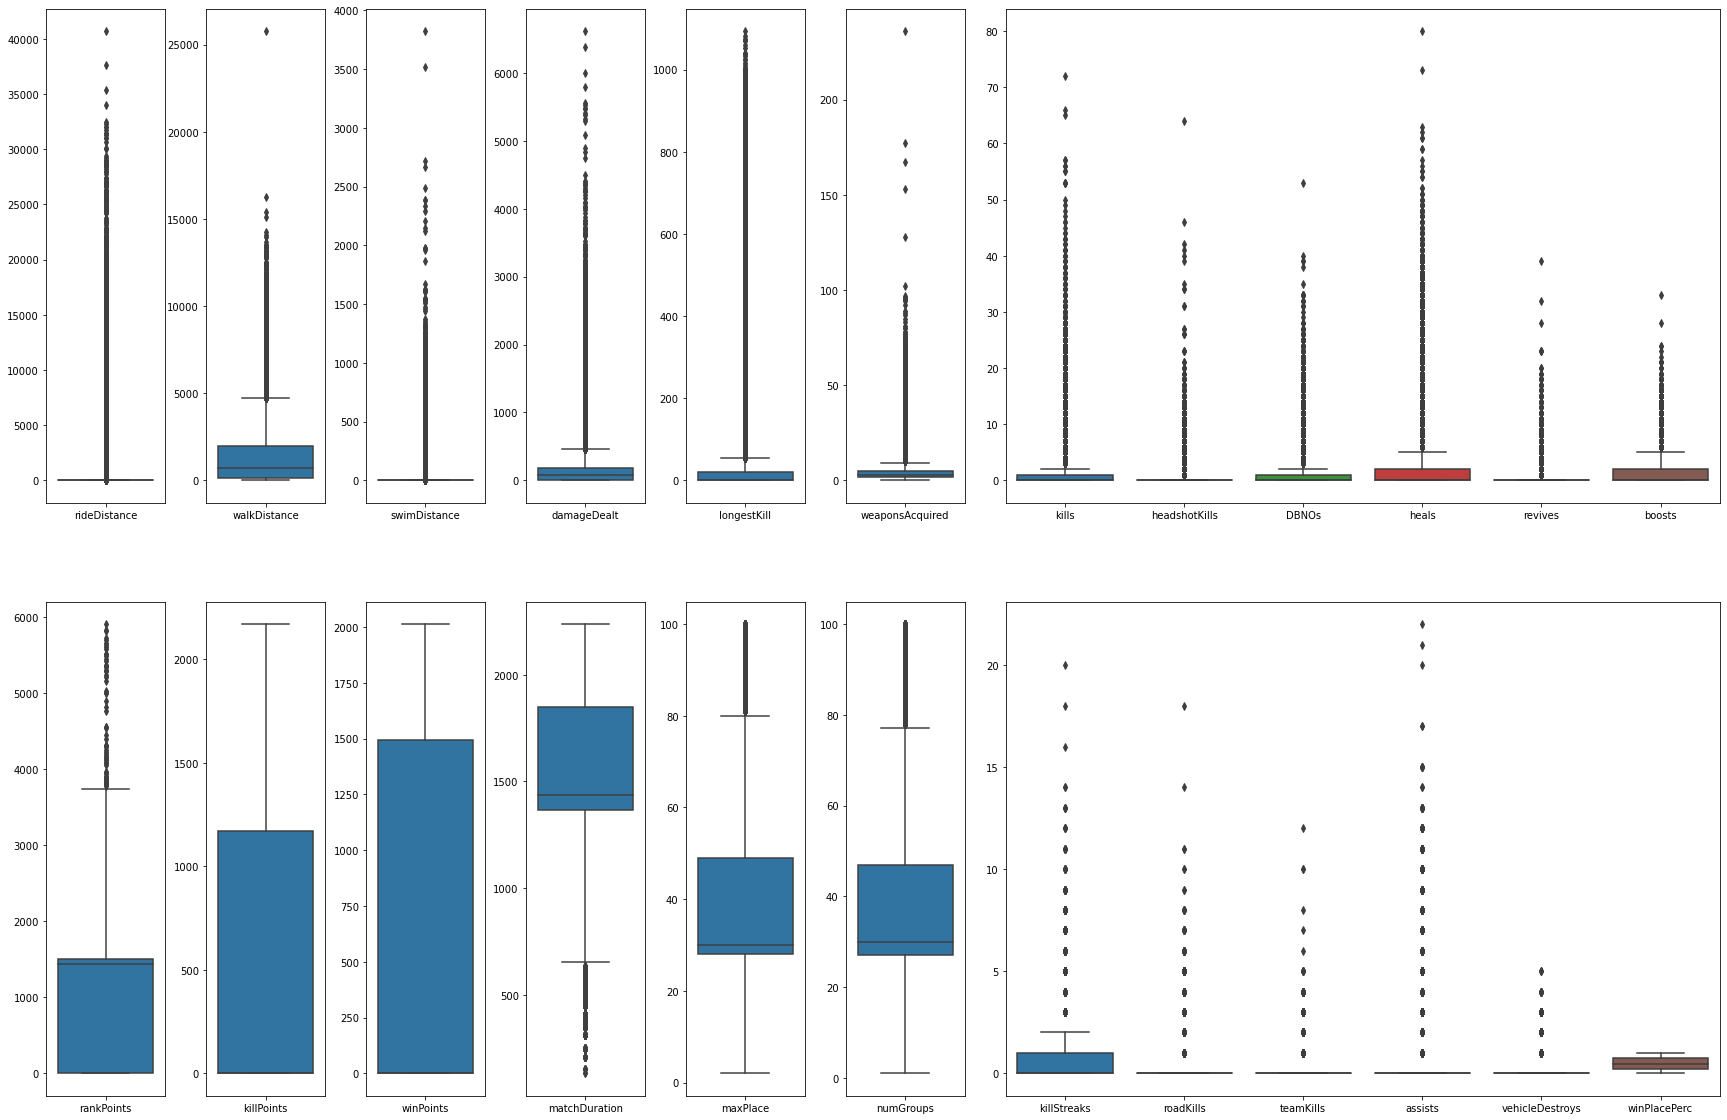

In [17]:
# Numerical columns 기준으로 자료 분포도 확인

train_n = train[num_columns]

fig = plt.figure(figsize=(30,20))

spec = grs.GridSpec(ncols=7, nrows=2, height_ratios=[1,1], width_ratios=[1, 1, 1, 1, 1, 1, 6])

ax00 = fig.add_subplot(spec[0])
sns.boxplot(data=train_n['rideDistance'])
plt.xticks([0], ['rideDistance'])

ax01 = fig.add_subplot(spec[1])
sns.boxplot(data=train_n['walkDistance'])
plt.xticks([0], ['walkDistance'])

ax02 = fig.add_subplot(spec[2])
sns.boxplot(data=train_n['swimDistance'])
plt.xticks([0], ['swimDistance'])

ax03 = fig.add_subplot(spec[3])
sns.boxplot(data=train_n['damageDealt'])
plt.xticks([0], ['damageDealt'])

ax04 = fig.add_subplot(spec[4])
sns.boxplot(data=train_n['longestKill'])
plt.xticks([0], ['longestKill'])

ax05 = fig.add_subplot(spec[5])
sns.boxplot(data=train_n['weaponsAcquired'])
plt.xticks([0], ['weaponsAcquired'])

ax06 = fig.add_subplot(spec[6])
sns.boxplot(data=train_n[['kills', 'headshotKills',  'DBNOs', 'heals', 'revives', 'boosts']])

ax07 = fig.add_subplot(spec[7])
sns.boxplot(data=train_n['rankPoints'])
plt.xticks([0], ['rankPoints'])

ax08 = fig.add_subplot(spec[8])
sns.boxplot(data=train_n['killPoints'])
plt.xticks([0], ['killPoints'])

ax09 = fig.add_subplot(spec[9])
sns.boxplot(data=train_n['winPoints'])
plt.xticks([0], ['winPoints'])

ax10 = fig.add_subplot(spec[10])
sns.boxplot(data=train_n['matchDuration'])
plt.xticks([0], ['matchDuration'])

ax11 = fig.add_subplot(spec[11])
sns.boxplot(data=train_n['maxPlace'])
plt.xticks([0], ['maxPlace'])

ax12 = fig.add_subplot(spec[12])
sns.boxplot(data=train_n['numGroups'])
plt.xticks([0], ['numGroups'])

ax13 = fig.add_subplot(spec[13])
sns.boxplot(data=train_n[['killStreaks', 'roadKills', 'teamKills', 'assists', 'vehicleDestroys', 'winPlacePerc']])

plt.show()

### <span style="color: #20B2AA">컬럼별 분석</span>

- column 구분 기준

|대분류|column명|설명|
|:------|:---|:---|
|**Target**|winPlacePerc|<span style="color: red">**예측 대상**</span>|
|**kill**|assists<br>damageDealt<br>DBNOs<br>headshotKills<br>~~killPlace~~ → <u>Data Leakage issue</u>로 인해 제외<br>kills<br>killStreaks<br>longestKill<br>roadKills<br>teamKills<br>weaponsAcquired|경쟁자 제거와 관련된 columns|
|**heal**|boosts<br>heals<br>revives|생존을 위한 회복과 관련된 columns|
|**move**|walkDistance<br>rideDistance<br>swimDistance|장기간 생존하기 위한 이동과 관련된 columns|
|**user**|groupId<br>matchId<br>matchDuration<br>matchType<br>maxPlace<br>numGroups|참여 인원수와 관련된 columns|
|**etc**|vehicleDestroys<br>killPoints<br>rankPoints<br>winPoints|그 외 columns|

#### <span style="color: #0000FF">winPlacePerc</span> column

<span style="color: red">**→ 예측 대상**</span>

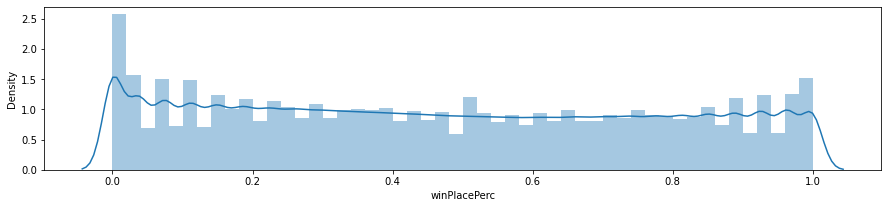

In [18]:
# 분포도 확인

plt.figure(figsize=(15,3))
sns.distplot(train['winPlacePerc'])

plt.show()

In [19]:
# winPlacePerc 데이터에 대한 중복 개수 확인

train_wv = train['winPlacePerc'].value_counts().to_frame().reset_index()
train_wv.columns=['winPlacePerc', 'count']
train_wv

winPlacePerc   count
0           0.0000  220505
1           1.0000  127573
2           0.5000   55065
3           0.3333   42508
4           0.6665   38112
...            ...     ...
2263        0.1774       1
2264        0.5645       1
2265        0.3064       1
2266        0.0167       1
2267        0.2878       1

[2268 rows x 2 columns]

In [20]:
# matchId 기준 groupId의 개수를 집계하여 5개 이상 / 5개 미만으로 데이터프레임 생성

train_mi = train.groupby('matchId')['winPlacePerc'].nunique().to_frame().reset_index()
train_mi.columns=['matchId', 'groupcnt']

def func(x):
    if x <= 5 :
        return 'less than 5'
    else :
        return '5 or more'

train_mi['groupcntType'] = train_mi.groupcnt.map(func)
train_mi

matchId  groupcnt groupcntType
0      0000a43bce5eec        28    5 or more
1      0000eb01ea6cdd        27    5 or more
2      0002912fe5ed71        92    5 or more
3      0003b92987589e        47    5 or more
4      0006eb8c17708d        44    5 or more
...               ...       ...          ...
47959  fffd74b5150cb4        27    5 or more
47960  fffe53015be300        92    5 or more
47961  fffe562611d981        23    5 or more
47962  fffe721f841f85        47    5 or more
47963  fffe92232706aa        29    5 or more

[47964 rows x 3 columns]

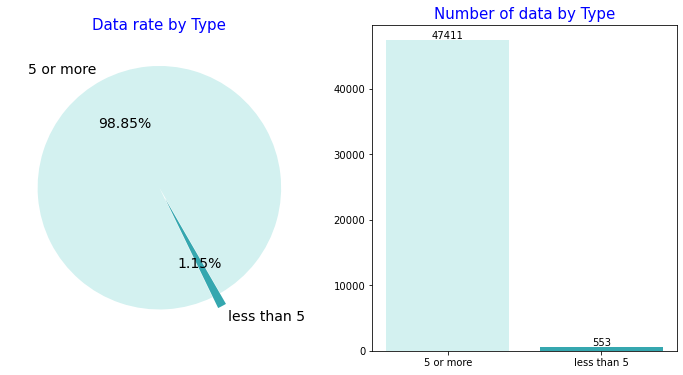

▶▶▶ 전체 게임 수는 47964개입니다.
▶▶▶ 한 게임 내에서 등수의 개수가 5보다 작은 게임 수는 553개입니다.


In [21]:
# 위의 데이터프레임을 시각화

ls5 = len(train_mi[train_mi['groupcntType']=='less than 5'])
mt5 = len(train_mi[train_mi['groupcntType']=='5 or more'])

df = pd.DataFrame({'Type': ['5 or more', 'less than 5'], 'count' : [mt5, ls5]})

fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,2,1)
df['count'].plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=graph1, labels=df['Type'], \
                     colors = ['#D3F1F0', '#35A7AF'], textprops={'fontsize': 14, 'color':'Black'}, startangle=-60)
graph1.set_title('Data rate by Type', fontsize=15, color='Blue')
graph1.set_ylabel('')

graph2 = fig.add_subplot(1,2,2)
plt.title('Number of data by Type', fontsize=15, color='Blue')
bar = plt.bar(df['Type'],df['count'], color = ['#D3F1F0', '#35A7AF'])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 10)
plt.show(fig)

# 해당 데이터를 matchId 기준(각각의 게임 기준)으로 집계하였을 때, 등수의 개수(winPlacePerc의 고윳값)가 5보다 작은 게임 수
print(f'▶▶▶ 전체 게임 수는 {mt5+ls5}개입니다.')
print(f'▶▶▶ 한 게임 내에서 등수의 개수가 5보다 작은 게임 수는 {ls5}개입니다.')

In [22]:
# 위에서 찾은 matchId들에 대해서만 데이터를 조회

train_w = train[train['matchId'].isin(train_mi['matchId'])]
train_w

Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
...                 ...             ...             ...      ...     ...   
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  killPoints  kills  \
0             0.0000      0              0      0        1241      0   
1            91.5000      0              0      0           0      0   
2            68.0000      0              0      0           0      0   
3            32.9062      0              0      0           0      0   
4           100.0000      0              0      0           0      1   
...              ...    ...            ...    ...         ...    ...   
4446961       0.0000      0              0      0        1029      0   
4446962      44.1562      0              0      0           0      0   
4446963      59.0625      0              0      0           0      0   
4446964     180.3750      1              1      2           0      2   
4446965     268.0000      0              0      1           0      2   

         killStreaks  longestKill  matchDuration  matchType  maxPlace  \
0                  0       0.0000           1306  squad-fpp        28   
1                  0       0.0000           1777  squad-fpp        26   
2                  0       0.0000           1318        duo        50   
3                  0       0.0000           1436  squad-fpp        31   
4                  1      58.5312           1424   solo-fpp        97   
...              ...          ...            ...        ...       ...   
4446961            0       0.0000           1873  squad-fpp        29   
4446962            0       0.0000           1435       solo        93   
4446963            0       0.0000           1321  squad-fpp        28   
4446964            1      98.5000           1373  squad-fpp        26   
4446965            1      78.2500           1766   solo-fpp        98   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
0               26          -1        0        0.0000          0   
1               25        1484        0        0.0045          0   
2               47        1491        0        0.0000          0   
3               30        1408        0        0.0000          0   
4               95        1560        0        0.0000          0   
...            ...         ...      ...           ...        ...   
4446961         28          -1        0     1292.0000          0   
4446962         93        1501        0        0.0000          0   
4446963         28        1500        0        0.0000          0   
4446964         25        1418        2        0.0000          0   
4446965         94        1590        0     1369.0000          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
0              0.0000          0                0      244.7500   
1             11.0391          0                0     1434.0000   
2              0.0000          0                0      161.7500   
3              0.0000          0                0      202.7500   
4              0.0000          0                0       49.7500   
...               ...        ...              ...           ...   
4446961        0.0000          0                0     1019.0000   
4446962      

In [23]:
# 위의 데이터들에 대해 groupId의 고윳값 확인
## groupId는 한 게임 내에서 팀원의 수를 의미하는데, 4를 초과하는 데이터들도 존재.

train_wg = train_w['groupId'].value_counts().to_frame().reset_index()
train_wg.columns=['groupId', 'count']
display(train_wg)

# 팀원의 수가 4를 초과하는 그룹의 수
cnt = len(train_wg[train_wg['count']>4])
print(f'▶▶▶ 한 게임 내에서 팀원의 수가 4를 초과하는 그룹의 수는 {cnt}개입니다.')

groupId  count
0        14d6b54cdec6bc     74
1        b8275198faa03b     72
2        128b07271aa012     64
3        7385e5fe214021     49
4        e52a2e6ca30474     36
...                 ...    ...
2026739  5941df37c809be      1
2026740  ab58ce5a22ed97      1
2026741  7b5f1742ce18a5      1
2026742  ed3a2c5863cee3      1
2026743  8c74f72fedf5ff      1

[2026744 rows x 2 columns]

▶▶▶ 한 게임 내에서 팀원의 수가 4를 초과하는 그룹의 수는 115580개입니다.


In [24]:
# 해당 데이터에서 winPlacePerc의 고윳값이 2인 특정 matchId에 대해 데이터를 재조회
# 한 게임 내에 groupId가 중복되어 winPlacePerc 데이터값이 2개 뿐이 없는 경우 (1등과 2등만 존재)

train_w1 = train_w[train_w['matchId']=='01aead02bb8901'].sort_values('groupId')
train_w1

Id         groupId         matchId  assists  boosts  \
3702     3fc123559fc935  5cef1df7ee3551  01aead02bb8901        0       0   
313663   1e726bf8c7afbf  5cef1df7ee3551  01aead02bb8901        0       0   
1843671  00d5eab45b85f3  5cef1df7ee3551  01aead02bb8901        0       0   
152897   d205ebdd9c0034  5cef1df7ee3551  01aead02bb8901        0       0   
231175   40b3cf3ded58ef  c70fd467685d53  01aead02bb8901        0       0   
3336416  b5f1deb62dccee  c70fd467685d53  01aead02bb8901        0       0   
3180808  4eaae52d4008df  c70fd467685d53  01aead02bb8901        0       0   
3025741  6db0c385a6d11b  c70fd467685d53  01aead02bb8901        0       0   
2711395  cbfc56a5e6d87d  c70fd467685d53  01aead02bb8901        0       0   
2530244  9068f020f88c37  c70fd467685d53  01aead02bb8901        0       0   
2323711  70a2cfb9e96107  c70fd467685d53  01aead02bb8901        0       0   
2312139  11859ac157cd8f  c70fd467685d53  01aead02bb8901        0       0   
3406804  b8f774ec845b92  c70fd467685d53  01aead02bb8901        0       0   
1692053  618a59dc602a34  c70fd467685d53  01aead02bb8901        0       0   
1322292  c5ae332274f01c  c70fd467685d53  01aead02bb8901        0       0   
764357   39c64d1652702e  c70fd467685d53  01aead02bb8901        0       0   
450942   3e5d4dea709622  c70fd467685d53  01aead02bb8901        0       0   
52509    0a2d95936da4ae  c70fd467685d53  01aead02bb8901        0       0   
1892880  a46deb101cfb73  c70fd467685d53  01aead02bb8901        0       0   
3623197  3abfe89c167d36  c70fd467685d53  01aead02bb8901        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPoints  kills  \
3702          0.0000      0              0      0           0      0   
313663      119.3750      0              0      0           0      0   
1843671       0.0000      0              0      0           0      0   
152897        0.0000      0              0      0           0      0   
231175        0.0000      0              0      0           0      0   
3336416     104.6875      0              0      0           0      0   
3180808     335.0000      0              0      0           0      0   
3025741     287.7500      0              0      0           0      0   
2711395       0.0000      0              0      0           0      0   
2530244       0.0000      0              0      0           0      0   
2323711      99.0000      0              0      0           0      0   
2312139      95.4375      0              0      0           0      0   
3406804       0.0000      0              0      0           0      0   
1692053     159.0000      0              0      0           0      0   
1322292       0.0000      0              0      0           0      0   
764357        0.0000      0              0      0           0      0   
450942       78.0000      0              0      0           0      0   
52509       178.5000      0              0      0           0      0   
1892880       0.0000      0              0      0           0      0   
3623197     288.2500      0              0      0           0      0   

         killStreaks  longestKill  matchDuration matchType  maxPlace  \
3702               0       0.0000           1808      solo        20   
313663             0       0.0000           1808      solo        20   
1843671            0       0.0000           1808      solo        20   
152897             0       0.0000           1808      solo        20   
231175             0       0.0000           1808      solo        20   
3336416            0       0.0000           1808      solo        20   
3180808            0       0.0000           1808      solo        20   
3025741            0       0.0000           1808      solo        20   
2711395            0       0.0000           1808      solo        20   
2530244            0       0.0000           1808      solo        20   
2323711            0       0.0000           1808      solo        20   
2312139            0       0.0000           180

<function matplotlib.pyplot.show(close=None, block=None)>

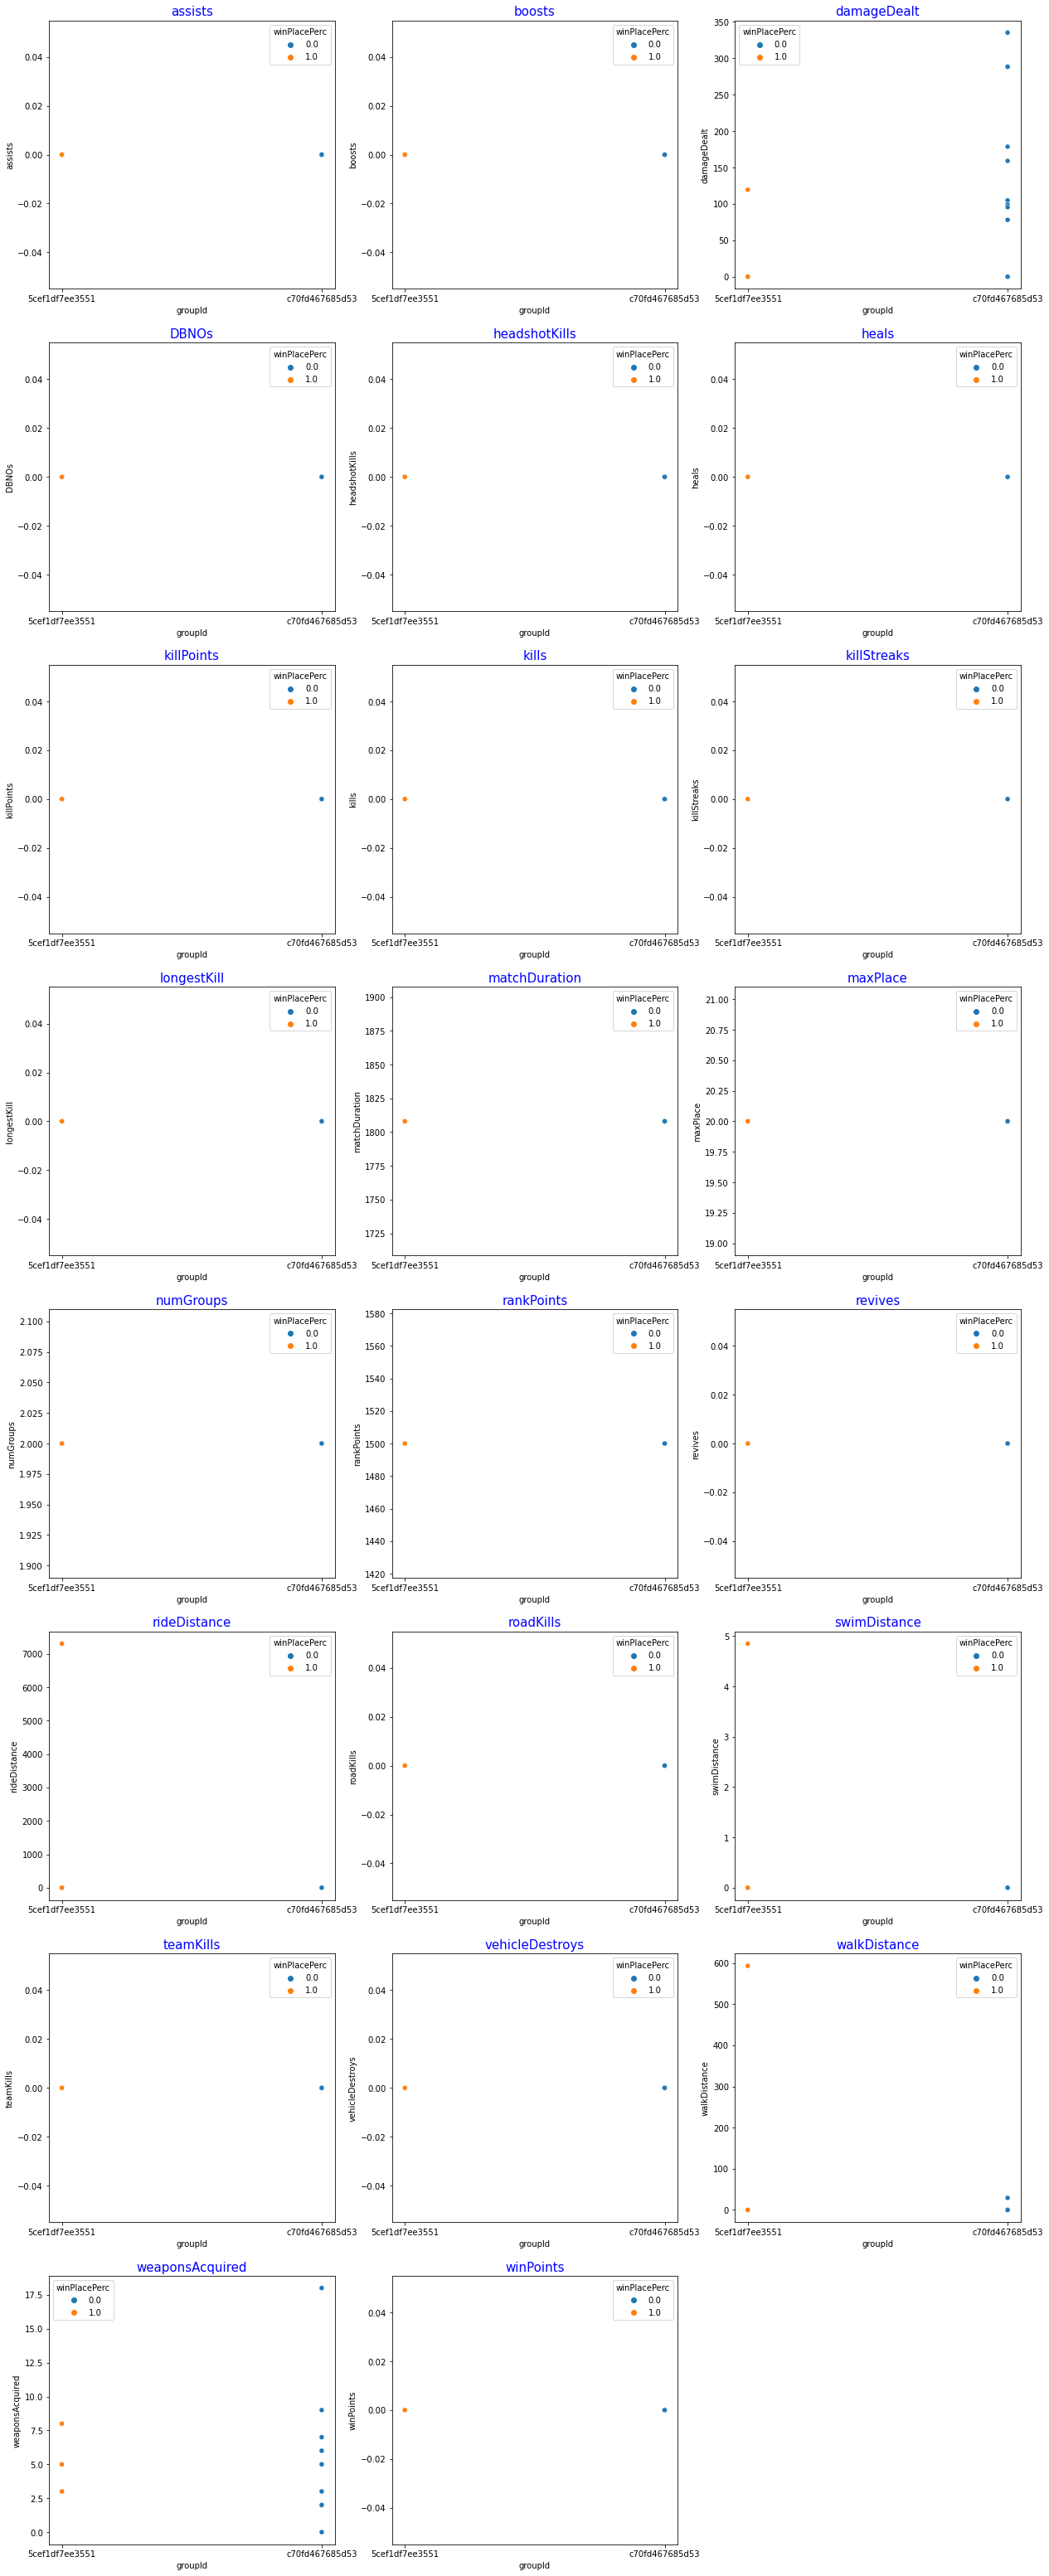

In [25]:
# 위의 데이터프레임을 시각화

fig = plt.figure(figsize=(21,56))

spec = grs.GridSpec(ncols=3, nrows=8)


for i in range(len(num_columns[:-1])):
    
    ax = fig.add_subplot(spec[i])
    plt.title(num_columns[i], )
    graph = sns.scatterplot(data=train_w1, x = 'groupId', y = num_columns[i], hue='winPlacePerc')
    plt.title(num_columns[i], fontsize=15, color='Blue')
    
plt.show

In [26]:
# 해당 데이터에서 winPlacePerc의 고윳값이 4인 특정 matchId에 대해 데이터를 재조회

train_w2 = train_w[train_w['matchId']=='ff80300f8262f5'].sort_values('groupId')
train_w2

Id         groupId         matchId  assists  boosts  \
3552532  db638834c62f6f  0614b611d6a935  ff80300f8262f5        2       0   
651652   84a0d8f500eecd  0614b611d6a935  ff80300f8262f5        2       0   
3772276  ba51dd0a1611c0  0614b611d6a935  ff80300f8262f5        2       0   
955229   332f8bf3c15185  0614b611d6a935  ff80300f8262f5        4       0   
4011971  7042a8e9bc84d1  0614b611d6a935  ff80300f8262f5        2       0   
3547864  54e80bee7e4bbd  0614b611d6a935  ff80300f8262f5        1       0   
2795156  f9b439648e66ca  0614b611d6a935  ff80300f8262f5        0       0   
221897   4304be99cdb4cd  763b360ade4f2b  ff80300f8262f5        2       0   
488589   ab4b2bb5386606  763b360ade4f2b  ff80300f8262f5        0       0   
3721648  809a1091b7b534  763b360ade4f2b  ff80300f8262f5        2       0   
2757680  79fc0dd5e5082b  763b360ade4f2b  ff80300f8262f5        0       0   
2045616  1cfd656545e1ce  b9768d06ed8071  ff80300f8262f5        2       0   
72671    113da47c31f26e  b9768d06ed8071  ff80300f8262f5        2       0   
1717804  518a8613d859f6  b9768d06ed8071  ff80300f8262f5        4       0   
2508292  234f080faa24e2  b9768d06ed8071  ff80300f8262f5        5       0   
3563192  737370ddd9ccec  b9768d06ed8071  ff80300f8262f5        1       0   
963325   b11213783ab27e  b9768d06ed8071  ff80300f8262f5        2       0   
3545534  a95a2a9cbf49e4  b9768d06ed8071  ff80300f8262f5        4       0   
2420237  887443d5b50e86  b9768d06ed8071  ff80300f8262f5        0       0   
2017821  f25f9f8ae306ee  c898b8222c263d  ff80300f8262f5        2       0   
2042985  2885d0cc808fae  c898b8222c263d  ff80300f8262f5        1       0   
1863386  63d82ad37f63f3  c898b8222c263d  ff80300f8262f5        3       0   
1730779  a7153c56dea9c4  c898b8222c263d  ff80300f8262f5        4       0   
1711429  92f9cded3f82a0  c898b8222c263d  ff80300f8262f5        3       0   
1481604  9a7273dfcb3bc3  c898b8222c263d  ff80300f8262f5        1       0   
1095422  ca9f1f8feb3f9d  c898b8222c263d  ff80300f8262f5        1       0   
1070720  448d8f2355de67  c898b8222c263d  ff80300f8262f5        1       0   
840169   95f46b046ec87a  c898b8222c263d  ff80300f8262f5        2       0   
2190076  a124761c033089  c898b8222c263d  ff80300f8262f5        0       0   
4223719  4f3c47aa7ea1e1  c898b8222c263d  ff80300f8262f5        1       0   

         damageDealt  DBNOs  headshotKills  heals  killPoints  kills  \
3552532     517.0000      0              0      0           0      5   
651652       38.5625      0              0      0           0      0   
3772276     460.2500      0              1      0           0      8   
955229      769.0000      0              0      0           0      9   
4011971     241.8750      0              0      0           0      4   
3547864      16.2969      0              0      0           0      0   
2795156       0.0000      0              0      0           0      0   
221897      197.5000      0              0      0           0      1   
488589       55.7500      0              0      0           0      0   
3721648     140.5000      0              0      0           0      0   
2757680      56.0312      0              0      0           0      1   
2045616     546.5000      0              0      0           0      7   
72671       444.7500      0              0      0           0      4   
1717804     617.5000      0              0      0           0      7   
2508292     811.5000      0              0      0           0      7   
3563192      99.6875      0              0      0           0      0   
963325      507.7500      0              0      0           0      5   
3545534     428.5000      0              2      0           0      7   
2420237       0.0000      0              0      0           0      0   
2017821     461.0000      0              0      0           0      3   
2042985     100.6875      0              0      0           0      1   
1863386     409.0000      0              0      0           0      3   
1730779 

<function matplotlib.pyplot.show(close=None, block=None)>

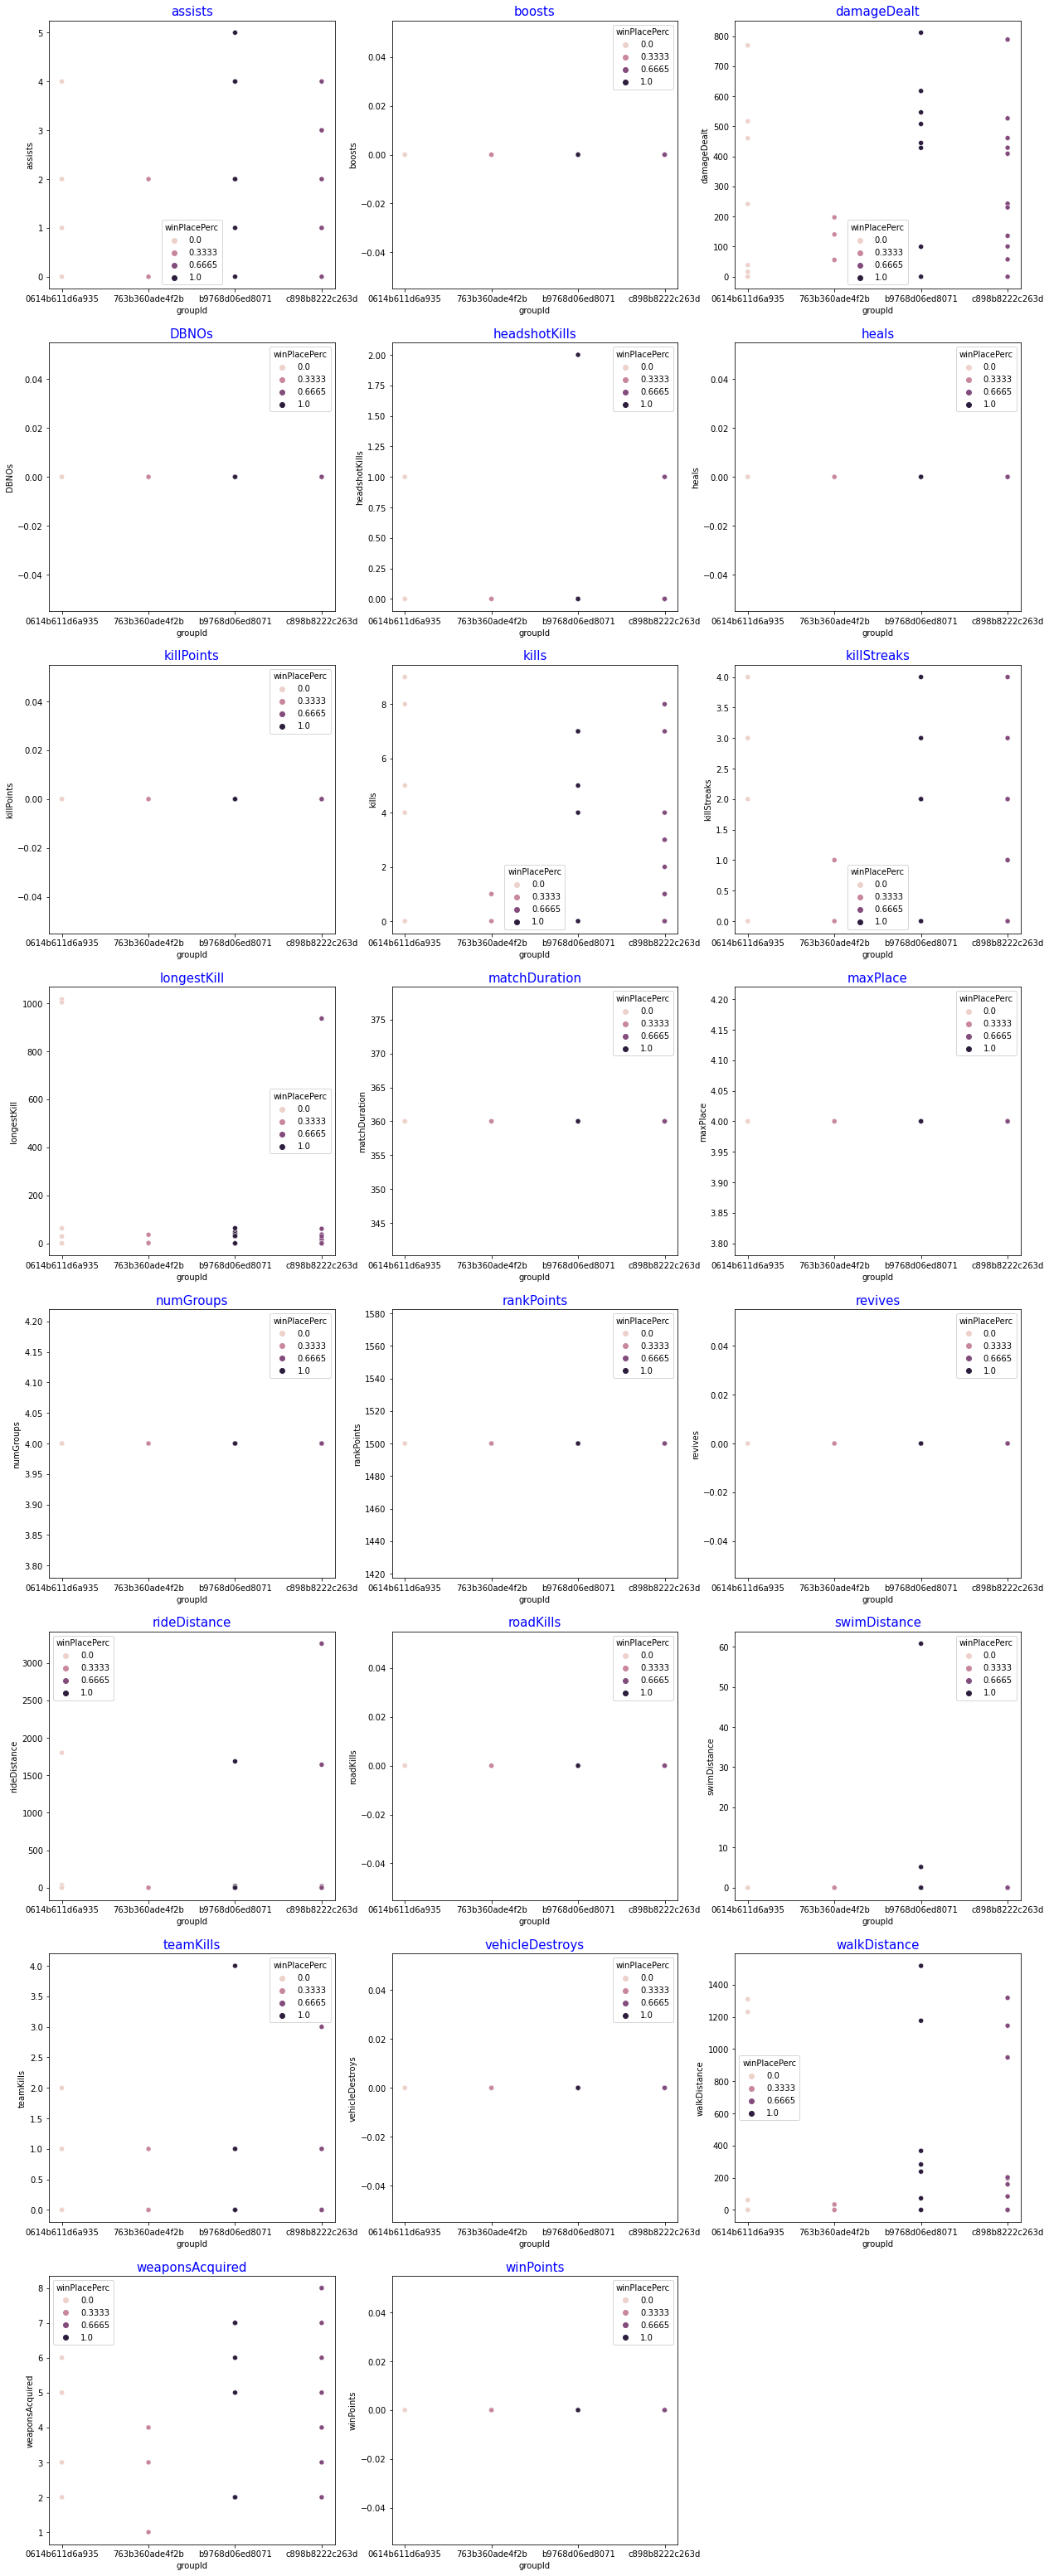

In [27]:
# 위의 데이터프레임을 시각화

fig = plt.figure(figsize=(21,56))

spec = grs.GridSpec(ncols=3, nrows=8)


for i in range(len(num_columns[:-1])):
    
    ax = fig.add_subplot(spec[i])
    plt.title(num_columns[i], )
    graph = sns.scatterplot(data=train_w2, x = 'groupId', y = num_columns[i], hue='winPlacePerc')
    plt.title(num_columns[i], fontsize=15, color='Blue')
    
plt.show

#### <span style="color: #0000FF">matchType</span> column

<span style="color: red">**→ 게임 모드 구분**</span>

**1. 표준 모드 / 그 외**

>|모드 구분|data|
|:------|:---|
|표준|"solo", "duo", "squad", "solo-fpp", "duo-fpp", "squad-fpp"|
|그 외|'crashfpp', 'crashtpp',  'flarefpp', 'flaretpp', <br>'normal-duo', 'normal-duo-fpp', 'normal-solo', 'normal-solo-fpp', 'normal-squad','normal-squad-fpp'|

**2. 팀별 모드**

>|모드 구분|data|
|:------|:---|
|solo|'normal-solo', 'normal-solo-fpp', 'solo', 'solo-fpp'|
|duo|'crashfpp', 'crashtpp', 'duo', 'duo-fpp', 'normal-duo', 'normal-duo-fpp'|
|squad|'normal-squad', 'normal-squad-fpp', 'squad', 'squad-fpp'|
|etc|'flarefpp', 'flaretpp'|

In [28]:
# 게임모드 구분
## → 'matchType' column의 data 활용

matchType = sorted(train['matchType'].unique())

# 표준 모드 / 그 외
matchType1_standard = ["solo", "duo", "squad", "solo-fpp", "duo-fpp", "squad-fpp"]
matchType1_etc =  [word for word in matchType if word not in matchType1_standard]
            # = ['crashfpp', 'crashtpp',  'flarefpp', 'flaretpp', 
            #    'normal-duo', 'normal-duo-fpp', 'normal-solo', 'normal-solo-fpp', 'normal-squad','normal-squad-fpp']

# 팀별 모드
matchType2_solo = [word for word in matchType if 'solo' in word]
              # = ['normal-solo', 'normal-solo-fpp', 'solo', 'solo-fpp']
matchType2_duo = [word for word in matchType if 'duo' in word or 'crash' in word]
              # = ['crashfpp', 'crashtpp', 'duo', 'duo-fpp', 'normal-duo', 'normal-duo-fpp']
matchType2_squad = [word for word in matchType if 'squad' in word]
              # = ['normal-squad', 'normal-squad-fpp', 'squad', 'squad-fpp']
matchType2_etc = list(set(matchType)-set(matchType2_solo)-set(matchType2_duo)-set(matchType2_squad))
              # = ['flarefpp', 'flaretpp']

In [29]:
# 게임모드를 standard/etc로 구분하여 새로운 컬럼 생성
train_mt = train.copy()

cond1 = train['matchType'].isin(matchType1_standard)
cond2 = train['matchType'].isin(matchType1_etc)

train_mt['mode']= pd.NaT
train_mt['mode'][cond1] = 'standard'
train_mt['mode'][cond2] = 'etc'
train_mt

Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
...                 ...             ...             ...      ...     ...   
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  killPoints  kills  \
0             0.0000      0              0      0        1241      0   
1            91.5000      0              0      0           0      0   
2            68.0000      0              0      0           0      0   
3            32.9062      0              0      0           0      0   
4           100.0000      0              0      0           0      1   
...              ...    ...            ...    ...         ...    ...   
4446961       0.0000      0              0      0        1029      0   
4446962      44.1562      0              0      0           0      0   
4446963      59.0625      0              0      0           0      0   
4446964     180.3750      1              1      2           0      2   
4446965     268.0000      0              0      1           0      2   

         killStreaks  longestKill  matchDuration  matchType  maxPlace  \
0                  0       0.0000           1306  squad-fpp        28   
1                  0       0.0000           1777  squad-fpp        26   
2                  0       0.0000           1318        duo        50   
3                  0       0.0000           1436  squad-fpp        31   
4                  1      58.5312           1424   solo-fpp        97   
...              ...          ...            ...        ...       ...   
4446961            0       0.0000           1873  squad-fpp        29   
4446962            0       0.0000           1435       solo        93   
4446963            0       0.0000           1321  squad-fpp        28   
4446964            1      98.5000           1373  squad-fpp        26   
4446965            1      78.2500           1766   solo-fpp        98   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
0               26          -1        0        0.0000          0   
1               25        1484        0        0.0045          0   
2               47        1491        0        0.0000          0   
3               30        1408        0        0.0000          0   
4               95        1560        0        0.0000          0   
...            ...         ...      ...           ...        ...   
4446961         28          -1        0     1292.0000          0   
4446962         93        1501        0        0.0000          0   
4446963         28        1500        0        0.0000          0   
4446964         25        1418        2        0.0000          0   
4446965         94        1590        0     1369.0000          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
0              0.0000          0                0      244.7500   
1             11.0391          0                0     1434.0000   
2              0.0000          0                0      161.7500   
3              0.0000          0                0      202.7500   
4              0.0000          0                0       49.7500   
...               ...        ...              ...           ...   
4446961        0.0000          0                0     1019.0000   
4446962      

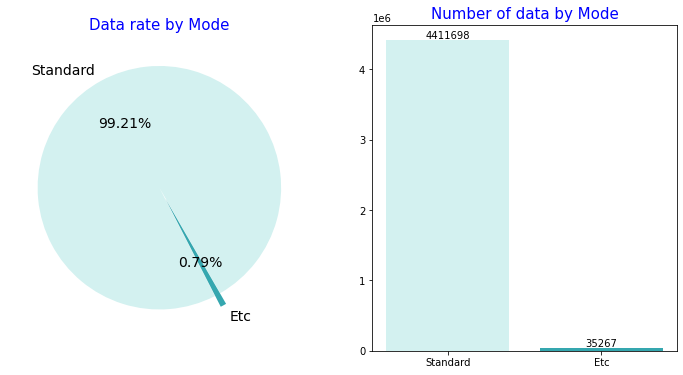

▶▶▶ 전체 참여 인원 수는 4446965명입니다.
▶▶▶ etc mode에 대한 참여 인원 수는 전체 참여 인원 대비 0.79%에 해당하는 35267명입니다.


In [30]:
# 위의 데이터프레임을 시각화

std = len(train_mt[train_mt['mode']=='standard'])
etc = len(train_mt[train_mt['mode']=='etc'])

df = pd.DataFrame({'mode': ['Standard', 'Etc'], 'count' : [std, etc]})

fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,2,1)
df['count'].plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=graph1, labels=df['mode'], \
                     colors = ['#D3F1F0', '#35A7AF'], textprops={'fontsize': 14, 'color':'Black'}, startangle=-60)
graph1.set_title('Data rate by Mode', fontsize=15, color='Blue')
graph1.set_ylabel('')

graph2 = fig.add_subplot(1,2,2)
plt.title('Number of data by Mode', fontsize=15, color='Blue')
bar = plt.bar(df['mode'],df['count'], color = ['#D3F1F0', '#35A7AF'])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 10)
plt.show(fig)

# 해당 데이터를 matchId 기준(각각의 게임 기준)으로 집계하였을 때, 등수의 개수(winPlacePerc의 고윳값)가 5보다 작은 게임 수
print(f'▶▶▶ 전체 참여 인원 수는 {std+etc}명입니다.')
print(f'▶▶▶ etc mode에 대한 참여 인원 수는 전체 참여 인원 대비 {round(100*etc/4446965,2)}%에 해당하는 {etc}명입니다.')

In [31]:
# 게임 mode 별 winPlacePerd에 따른 각 컬럼의 평균치를 비교해보기 위해 새로 데이터프레임 제작

train_mts = train[train['matchType'].isin(matchType1_standard)]
train_mte = train[train['matchType'].isin(matchType1_etc)]

train_mts2 = train_mts.groupby(['winPlacePerc']).mean()
train_mte2 = train_mte.groupby(['winPlacePerc']).mean()

======================================== ASSISTS ============================================================



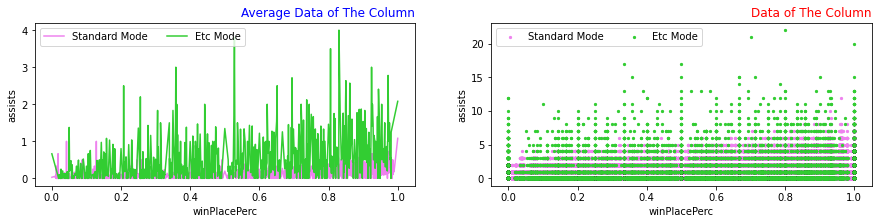

======================================== BOOSTS ============================================================



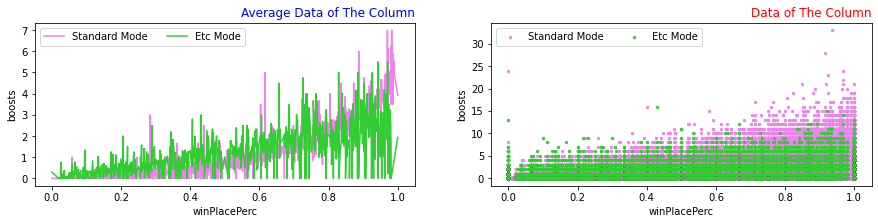

======================================== DAMAGEDEALT ============================================================



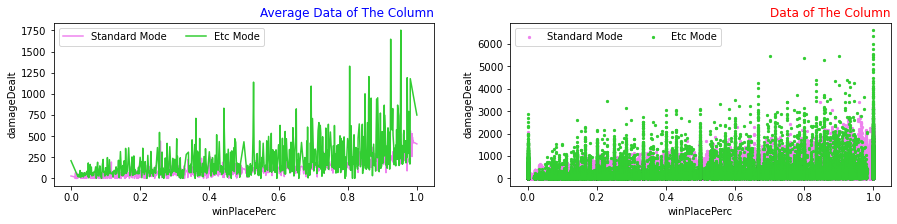

======================================== DBNOS ============================================================



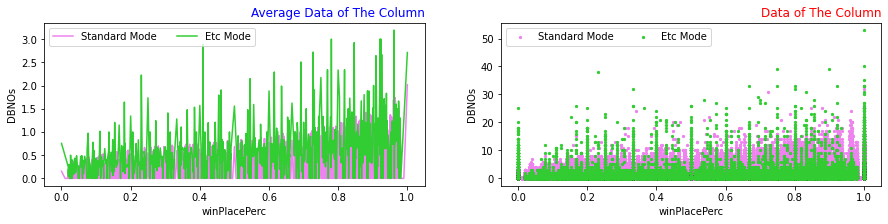

======================================== HEADSHOTKILLS ============================================================



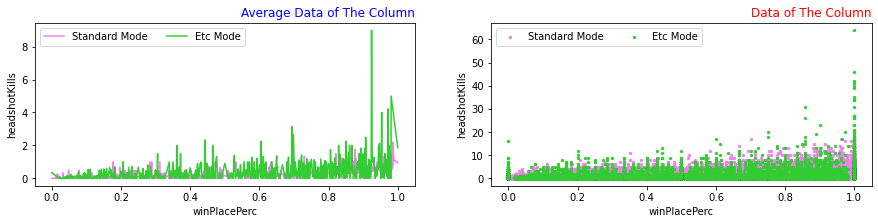

======================================== HEALS ============================================================



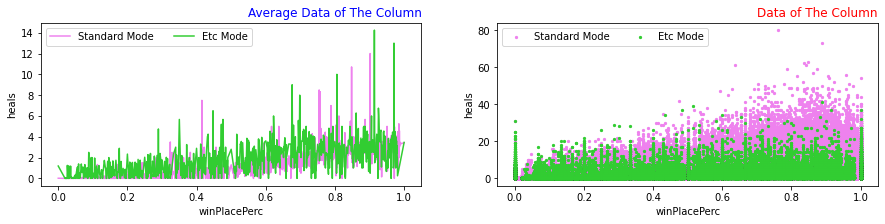

======================================== KILLPOINTS ============================================================



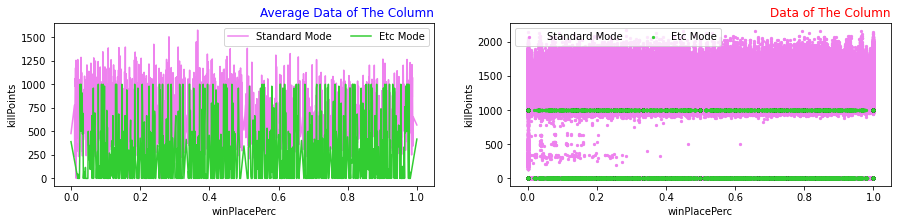

======================================== KILLS ============================================================



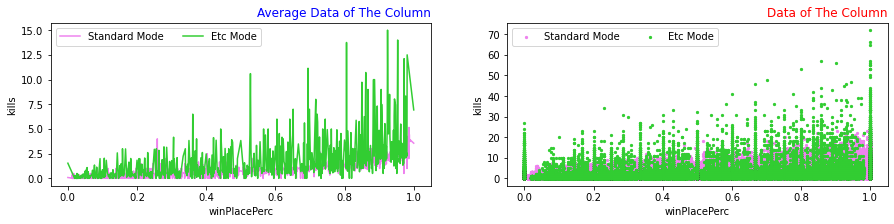

======================================== KILLSTREAKS ============================================================



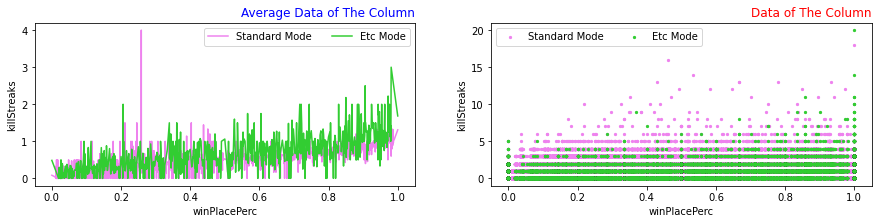

======================================== LONGESTKILL ============================================================



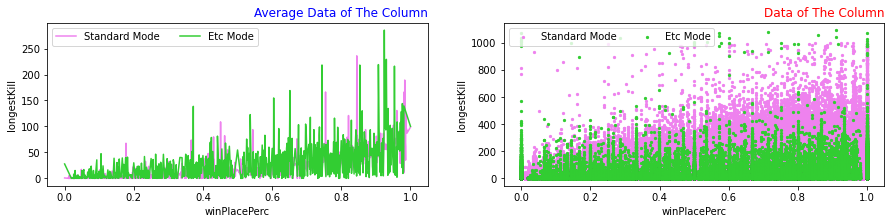

======================================== MATCHDURATION ============================================================



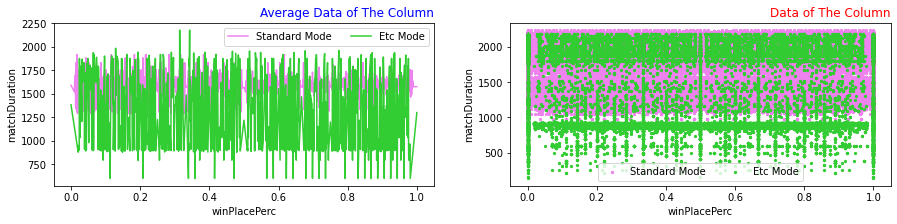

======================================== MAXPLACE ============================================================



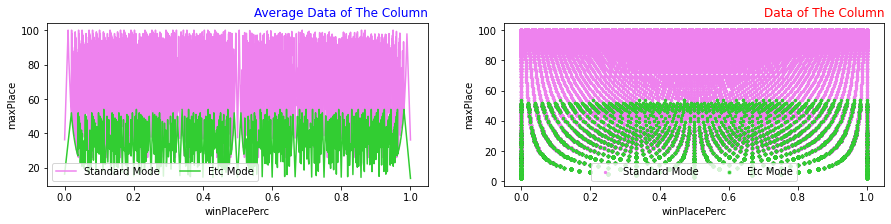

======================================== NUMGROUPS ============================================================



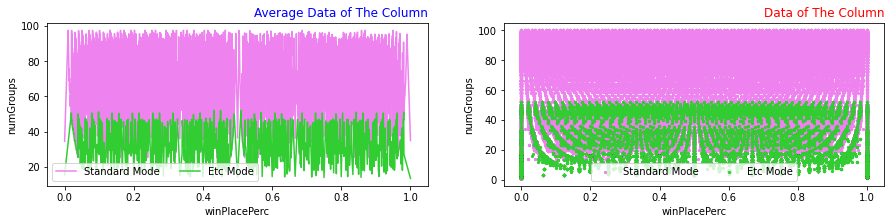

======================================== RANKPOINTS ============================================================



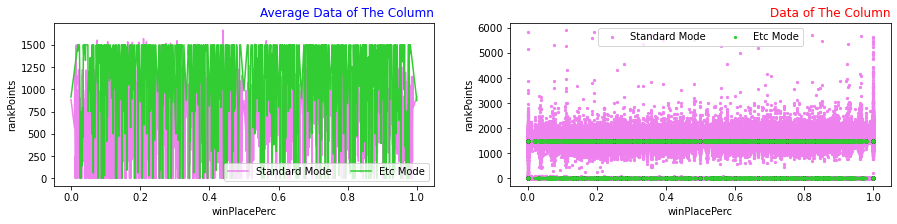

======================================== REVIVES ============================================================



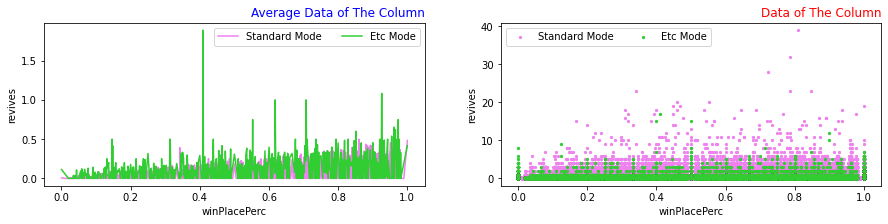

======================================== RIDEDISTANCE ============================================================



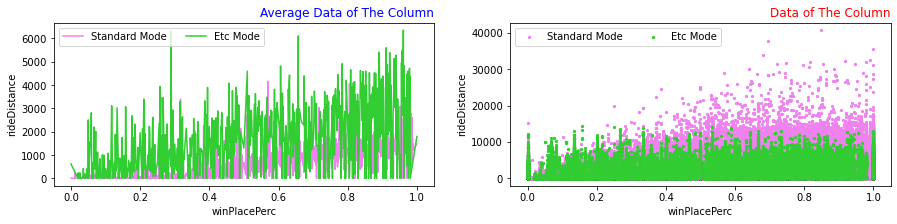

======================================== ROADKILLS ============================================================



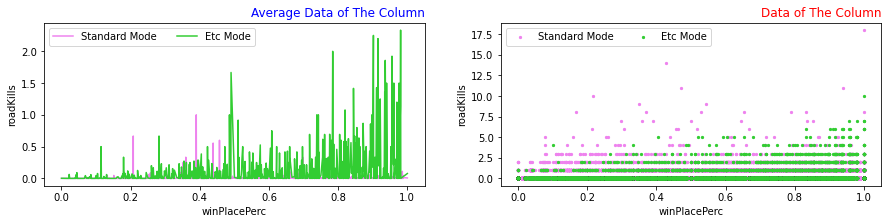

======================================== SWIMDISTANCE ============================================================



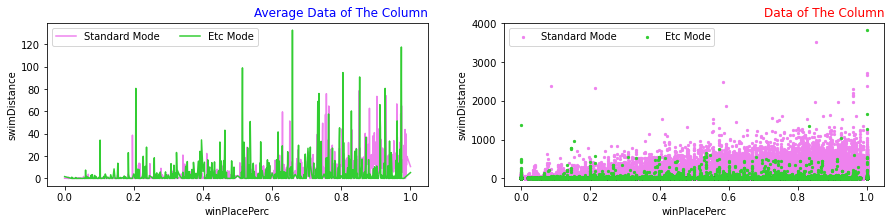

======================================== TEAMKILLS ============================================================



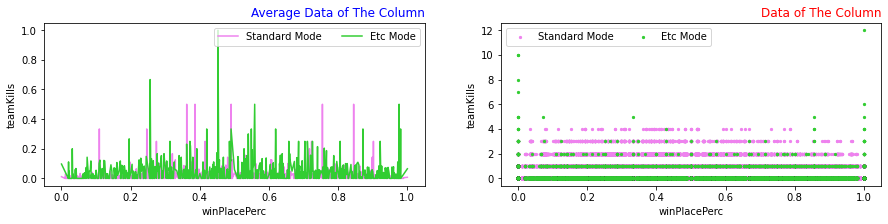

======================================== VEHICLEDESTROYS ============================================================



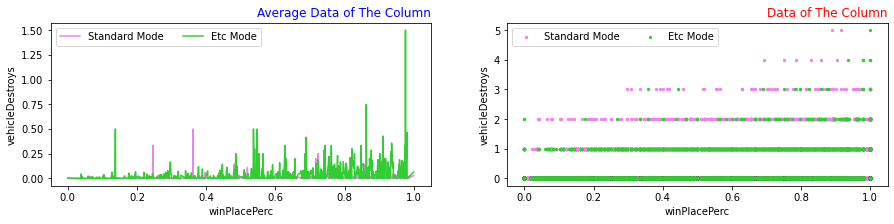

======================================== WALKDISTANCE ============================================================



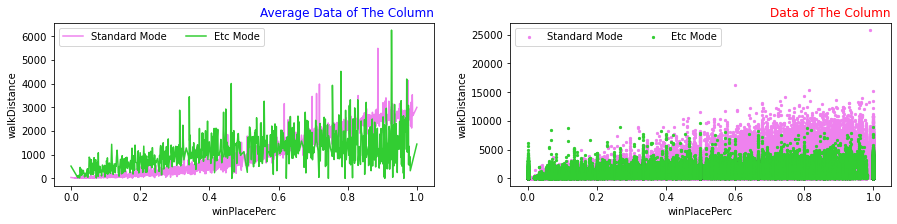

======================================== WEAPONSACQUIRED ============================================================



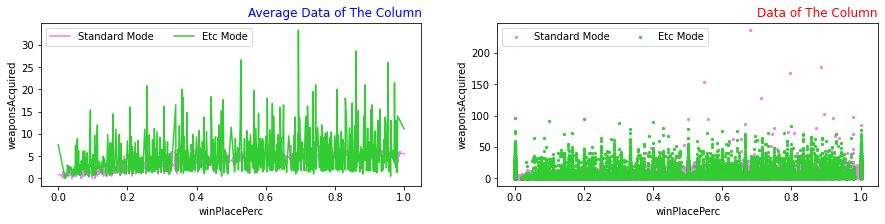

======================================== WINPOINTS ============================================================



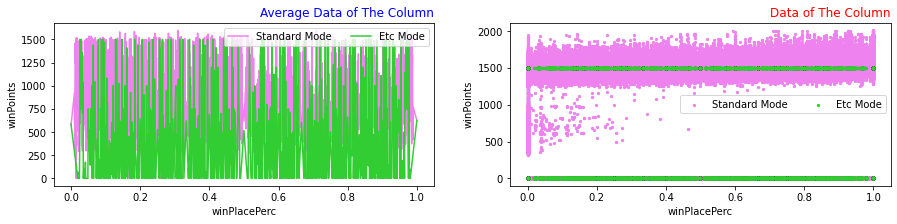

In [32]:
# standard 모드와 그 외 모드를 lineplot과 scatterplot으로 확인
## 모드별 데이터 분포의 유사성을 확인해보고자 함

for col in num_columns[:-1]:
    print("="*40+" {} ".format(col).upper()+"="*60+"\n")
    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1)
    plt.plot(train_mts2[col], label='Standard Mode', color='violet')
    plt.plot(train_mte2[col], label='Etc Mode', color='limegreen')
    plt.xlabel('winPlacePerc')
    plt.ylabel(col)
    plt.title('Average Data of The Column', loc='right', color='Blue')
    plt.legend(loc='best', ncol=2)
    
    plt.subplot(1,2,2)
    plt.scatter(train_mts['winPlacePerc'], train_mts[col], label='Standard Mode', c='violet', s=5)
    plt.scatter(train_mte['winPlacePerc'], train_mte[col], label='Etc Mode', c='limegreen', s=5)
    plt.xlabel('winPlacePerc')
    plt.ylabel(col)
    plt.title('Data of The Column', loc='right', color='Red')
    plt.legend(loc='best', ncol=2)
    
    plt.show()

- 데이터 분포를 살펴보았을때는 Standard Mode와 Etc Mode 간의 <span style="color: #B8860B">유사성을 발견하긴 힘들었으나</span>  
    <span style="color: red">데이터 수가 많지 않아서</span> **<span style="color: #0000FF">모델학습 시, 큰 영향을 주지 않을 것이라 판단</span>**하였습니다.

#### <span style="color: #0000FF">groupId</span> column

<span style="color: red">**→ 한 게임 내에서 그룹을 식별하기 위한 ID**</span>

> **PUBG는 한 게임에서 최대 4인의 팀 구성이 가능**

In [33]:
# groupId의 고윳값 확인

train_g = train.copy()
train_g.groupId.value_counts()

14d6b54cdec6bc    74
b8275198faa03b    72
128b07271aa012    64
7385e5fe214021    49
e52a2e6ca30474    36
                  ..
5941df37c809be     1
ab58ce5a22ed97     1
7b5f1742ce18a5     1
ed3a2c5863cee3     1
8c74f72fedf5ff     1
Name: groupId, Length: 2026744, dtype: int64

In [34]:
# 'groupId'별로 집계해서 groupId의 고윳값을 생성 후, 새로 생성한 'groupcnd' 라는 새로운 column의 데이터로 넣음.

train_g['groupcnt']=train_g.groupby('groupId').groupId.transform('count')

# groupId의 고윳값이 4를 초과하는 데이터 탐색

train_g[train_g['groupcnt']>4]

Id         groupId         matchId  assists  boosts  \
5        ff79c12f326506  289a6836a88d27  bac52627a12114        0       0   
6        95959be0e21ca3  2c485a1ad3d0f1  a8274e903927a2        0       0   
10       2b574d43972813  c549efede67ad3  2dd6ddb8320fc1        0       0   
16       62f2f0917d84b2  f61b698274d9f5  1d6cfe0f6f23b0        0       2   
19       71cbdbc3b263e5  7b61f74b51906c  a329ac99449ad7        0       1   
...                 ...             ...             ...      ...     ...   
4446938  7718e7c0c355a3  54d5ce5a79e0f6  06def1c4d808d4        0       0   
4446953  372304ea470cad  0db6cf38e79c9e  a530fd807f535a        0       0   
4446958  837349af7e8a35  58bc4104935623  2001300d4f5787        0       0   
4446960  69fa4c2d5431b1  2a3ad0e37fb6ce  818ccf2160343f        0       0   
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPoints  kills  \
5           100.0000      1              1      0           0      1   
6             0.0000      0              0      0        1262      0   
10           28.3750      0              0      0           0      0   
16           81.6875      1              0     14           0      1   
19           65.2500      0              0      1        1349      0   
...              ...    ...            ...    ...         ...    ...   
4446938       0.0000      0              0      0           0      0   
4446953      30.0938      0              0      0        1364      0   
4446958       0.0000      0              0      0           0      0   
4446960     327.7500      3              2      0           0      4   
4446961       0.0000      0              0      0        1029      0   

         killStreaks  longestKill  matchDuration  matchType  maxPlace  \
5                  1      18.4375           1395  squad-fpp        28   
6                  0       0.0000           1316  squad-fpp        28   
10                 0       0.0000           1811  squad-fpp        29   
16                 1       9.1562           1882  squad-fpp        27   
19                 0       0.0000           1322  squad-fpp        30   
...              ...          ...            ...        ...       ...   
4446938            0       0.0000           1297  squad-fpp        27   
4446953            0       0.0000           1318  squad-fpp        28   
4446958            0       0.0000           1414    duo-fpp        48   
4446960            3      90.2500           1936  squad-fpp        30   
4446961            0       0.0000           1873  squad-fpp        29   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
5               28        1418        0        0.0000          0   
6               28          -1        0        0.0000          0   
10              29        1475        0        0.0000          0   
16              26        1436        0      520.0000          0   
19              28           0        0        0.0000          0   
...            ...         ...      ...           ...        ...   
4446938         26        1088        0        0.0000          0   
4446953         25          -1        1        0.0000          0   
4446958         44        1546        0        0.0000          0   
4446960         28        1477        0      180.3750          0   
4446961         28          -1        0     1292.0000          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
5              0.0000          0                0       34.6875   
6              0.0000          0                0       13.5000   
10             0.0000          0                0      868.5000   
16             0.0000          0                0     3674.0000   
19            20.8438          0                0     3310.0000   
...               ...        ...              ...           ...   
4446938       72.1875          0                0      173.1250   
4446953      

In [35]:
# groupId의 고윳값이 4를 초과하는 게임의 matchId 조회
train_g[train_g['groupcnt']>4]['matchId'].unique()

array(['bac52627a12114', 'a8274e903927a2', '2dd6ddb8320fc1', ...,
       'b74f0be3f39c2b', 'a26e8745951f00', '00086c74bb4efc'], dtype=object)

In [36]:
# 게임 mode별 조건 생성
cond1 = train['matchType'].isin(matchType1_standard)
cond2 = train['matchType'].isin(matchType1_etc)

# 'mode'라는 새로운 column 생성 후, 위의 조건에 맞는 데이터를 삽입
train_g['mode']= pd.NaT
train_g['mode'][cond1] = 'standard'
train_g['mode'][cond2] = 'etc'
train_g

Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
...                 ...             ...             ...      ...     ...   
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  killPoints  kills  \
0             0.0000      0              0      0        1241      0   
1            91.5000      0              0      0           0      0   
2            68.0000      0              0      0           0      0   
3            32.9062      0              0      0           0      0   
4           100.0000      0              0      0           0      1   
...              ...    ...            ...    ...         ...    ...   
4446961       0.0000      0              0      0        1029      0   
4446962      44.1562      0              0      0           0      0   
4446963      59.0625      0              0      0           0      0   
4446964     180.3750      1              1      2           0      2   
4446965     268.0000      0              0      1           0      2   

         killStreaks  longestKill  matchDuration  matchType  maxPlace  \
0                  0       0.0000           1306  squad-fpp        28   
1                  0       0.0000           1777  squad-fpp        26   
2                  0       0.0000           1318        duo        50   
3                  0       0.0000           1436  squad-fpp        31   
4                  1      58.5312           1424   solo-fpp        97   
...              ...          ...            ...        ...       ...   
4446961            0       0.0000           1873  squad-fpp        29   
4446962            0       0.0000           1435       solo        93   
4446963            0       0.0000           1321  squad-fpp        28   
4446964            1      98.5000           1373  squad-fpp        26   
4446965            1      78.2500           1766   solo-fpp        98   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
0               26          -1        0        0.0000          0   
1               25        1484        0        0.0045          0   
2               47        1491        0        0.0000          0   
3               30        1408        0        0.0000          0   
4               95        1560        0        0.0000          0   
...            ...         ...      ...           ...        ...   
4446961         28          -1        0     1292.0000          0   
4446962         93        1501        0        0.0000          0   
4446963         28        1500        0        0.0000          0   
4446964         25        1418        2        0.0000          0   
4446965         94        1590        0     1369.0000          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
0              0.0000          0                0      244.7500   
1             11.0391          0                0     1434.0000   
2              0.0000          0                0      161.7500   
3              0.0000          0                0      202.7500   
4              0.0000          0                0       49.7500   
...               ...        ...              ...           ...   
4446961        0.0000          0                0     1019.0000   
4446962      

In [37]:
# groupId의 고윳값이 4가 넘는 데이터 중, 전체/표준/그 외에 대해 각각의 데이터 프레임 생성
## 전체 데이터 프레임
train_g1 = train_g[train_g['groupcnt']>4]
## 표준 mode 데이터 프레임
train_g2 = train_g1[train_g1['mode']=='standard']
## 그 외 mode 데이터 프레임
train_g3 = train_g1[train_g1['mode']=='etc']

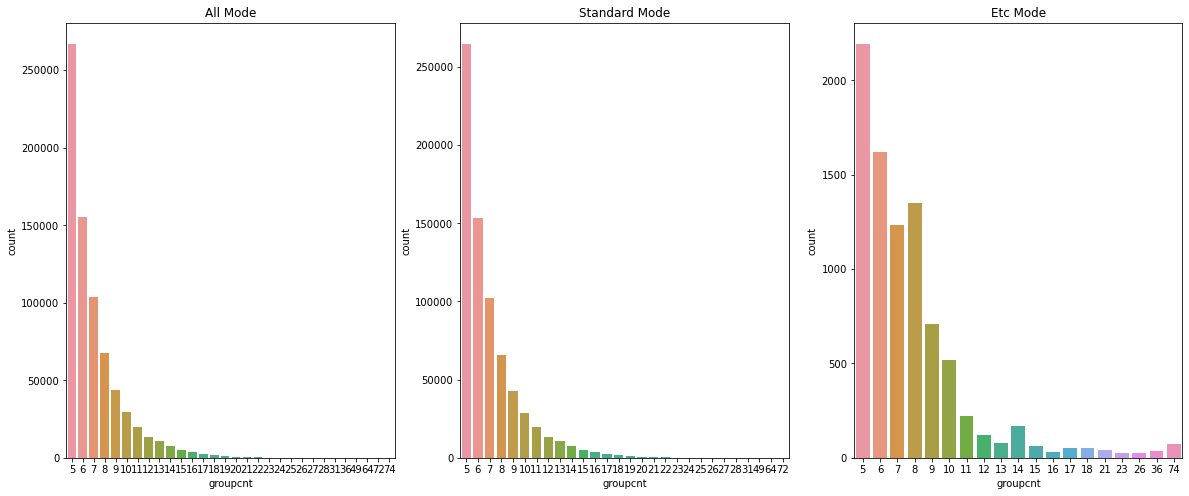

▶▶▶ groupId의 고윳값이 4를 초과하는 데이터는 각각의 모드에 골고루 분포함을 확인


In [38]:
# 전체/표준/그 외 mode에 대해 groupId의 고윳값에 대한 데이터의 수를 countplot으로 표현

fig = plt.figure(figsize=(20,8))

spec = grs.GridSpec(ncols=3, nrows=1, width_ratios=[1, 1, 1])

ax00 = fig.add_subplot(spec[0])
sns.countplot(x='groupcnt', data=train_g1)
plt.title('All Mode')
# plt.xticks([0], ['rideDistance'])

ax01 = fig.add_subplot(spec[1])
sns.countplot(x='groupcnt', data=train_g2)
plt.title('Standard Mode')
# plt.xticks([0], ['walkDistance'])

ax02 = fig.add_subplot(spec[2])
sns.countplot(x='groupcnt', data=train_g3)
plt.title('Etc Mode')
# plt.xticks([0], ['walkDistance'])

plt.show()

print(f'▶▶▶ groupId의 고윳값이 4를 초과하는 데이터는 각각의 모드에 골고루 분포함을 확인')

In [42]:
# groupcnt 20초과 게임 조회
print('초과 판 수', len(train_g[train_g['groupcnt'] >20].matchId.unique()))
indexs = train_g[train_g['groupcnt'] >20].sort_values(by='groupcnt', ascending=False).matchId.unique()

초과 판 수 59


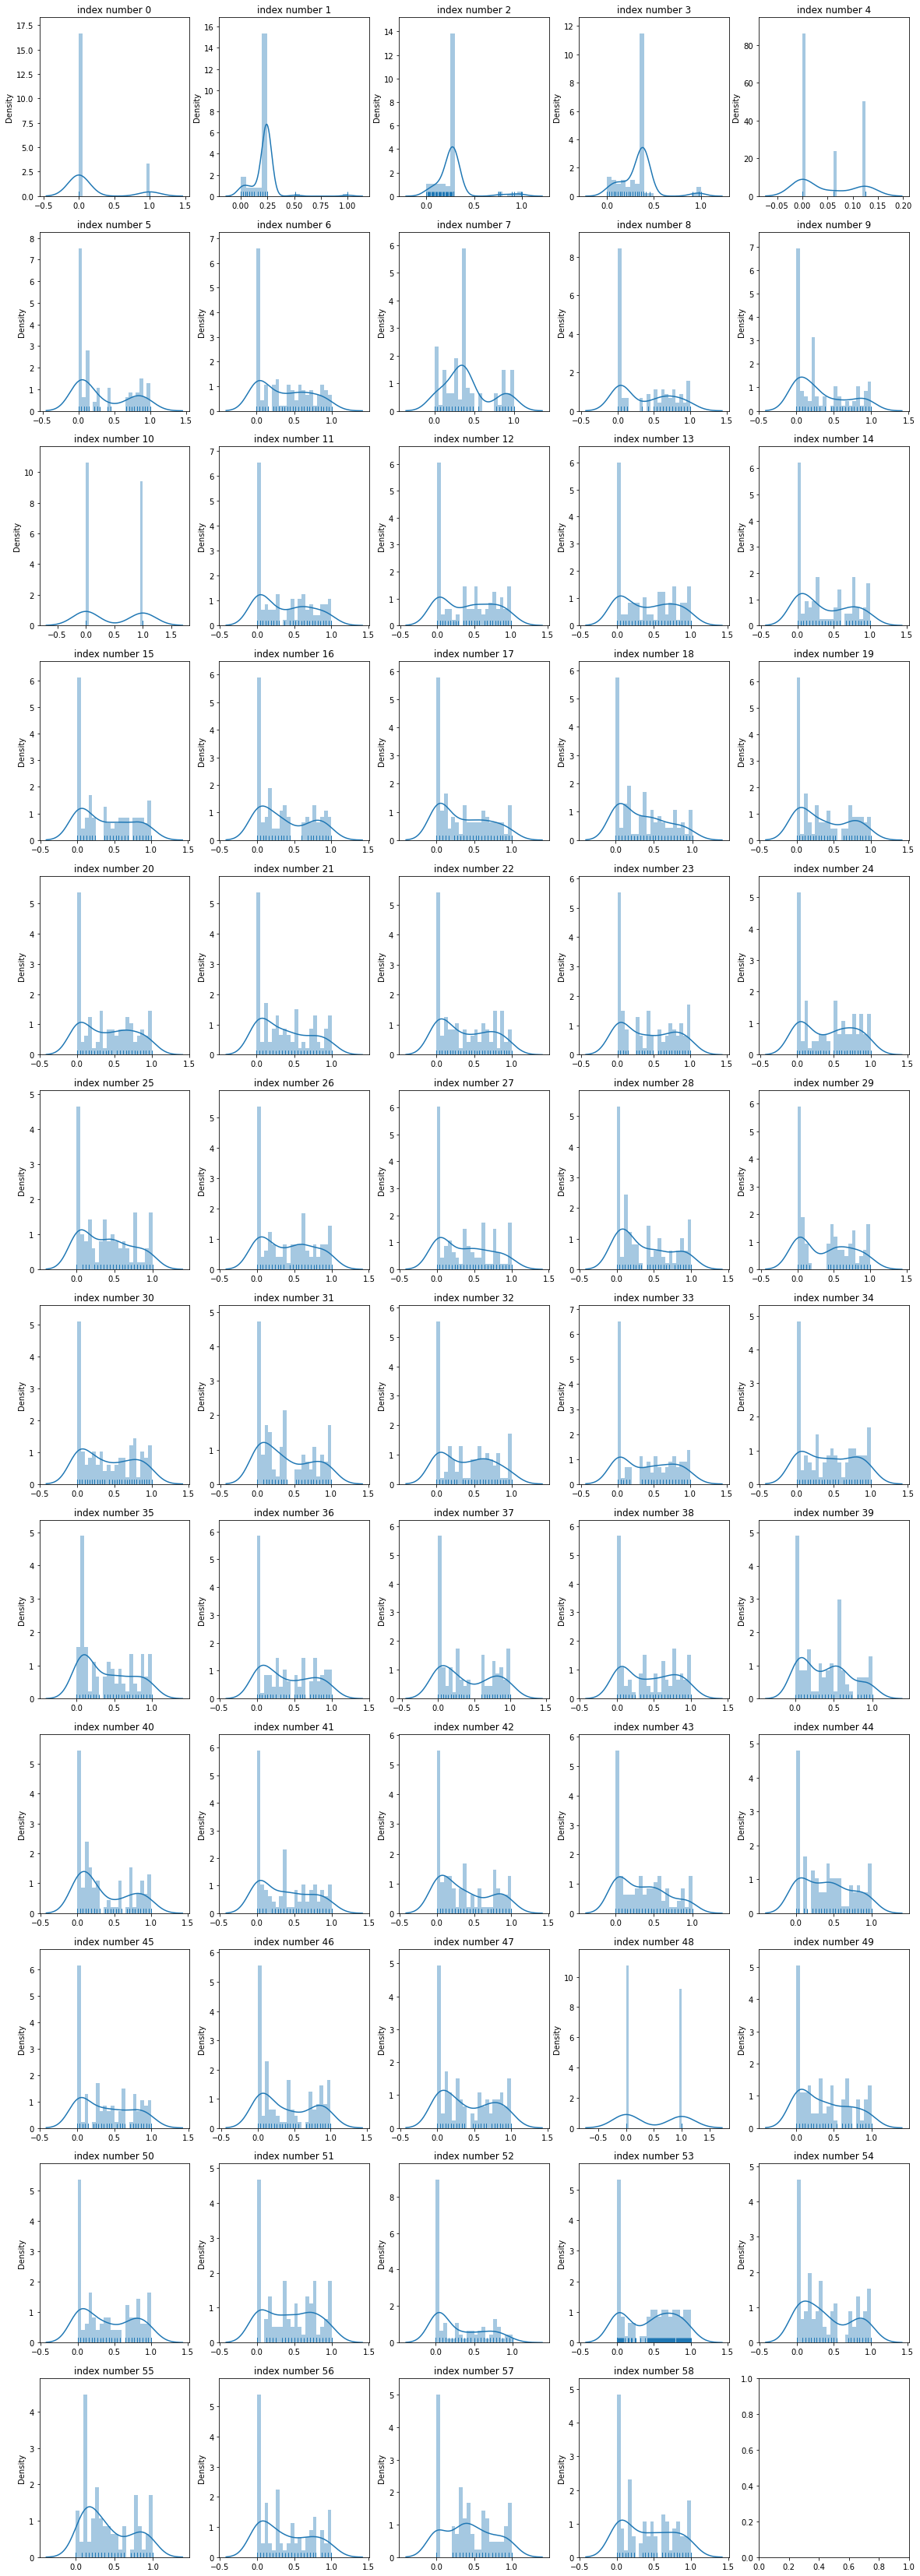

In [43]:
# 위에서 조회한 matchId별 groupcnt 높은 순서데로 그리기
col_n = 5
row_n = 12

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i, index in enumerate(indexs):
    
    sns.distplot(x=train_g[train_g['matchId']==index].winPlacePerc,
                 kde=True, rug=True, bins=20, ax=ax[int(i/col_n),int(i%col_n)]).set_title(f'index number {i}')

위의 그래프들의 분포도를 서로 비교하였을 때, groupcnt 값이 높은 그래프들의 모양이 다른 것들과는 매우 다름을 발견

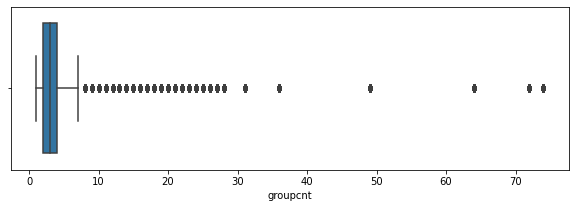

array(['3e029737889ce9', '41a634f62f86b7', 'b30f3d87189aa6',
       '7e93ce71ac6f61', '3c2531adf5b942', '701c7251415d15'], dtype=object)

In [44]:
# groupID의 고윳값에 대한 boxplot 표현

plt.figure(figsize=(10,3))
sns.boxplot(train_g['groupcnt'])
plt.show()

# 동일한 groupId가 30개이상 있는 게임의 matchId를 조회
train_g[train_g['groupcnt'] >30].matchId.unique()

In [45]:
# groupID의 고윳값이 30을 초과하는 게임의 matchID를 조회
mId = train_g[train_g['groupcnt'] >30].matchId.unique()
print(f'▶▶▶ grouID의 고윳값이 30을 초과하는 게임 수는 총 {len(mId)}개이며, 해당 게임의 matchID는 {mId}입니다.')

▶▶▶ grouID의 고윳값이 30을 초과하는 게임 수는 총 6개이며, 해당 게임의 matchID는 ['3e029737889ce9' '41a634f62f86b7' 'b30f3d87189aa6' '7e93ce71ac6f61'
 '3c2531adf5b942' '701c7251415d15']입니다.


In [46]:
# 위의 matchId 중 특정 데이터 조회
train_g4 = train_g[train_g['matchId']=='3e029737889ce9']
train_g4

Id         groupId         matchId  assists  boosts  \
12510    305f18f6977ff6  b8275198faa03b  3e029737889ce9        0       0   
53334    fed135797930df  08377106391dc7  3e029737889ce9        0       0   
122324   c19ddcb890552b  014d49e075248d  3e029737889ce9        0       0   
146910   6f5d3d368ee743  b8275198faa03b  3e029737889ce9        0       0   
157801   4e12f9f6e36118  b8275198faa03b  3e029737889ce9        0       0   
...                 ...             ...             ...      ...     ...   
4309998  657ed67898dd27  b8275198faa03b  3e029737889ce9        0       0   
4326034  7d8e50f722106f  c0c6410068769c  3e029737889ce9        0       0   
4372085  d7957ad70156bf  b8275198faa03b  3e029737889ce9        0       0   
4392134  cd64d7bddbe9f2  b8275198faa03b  3e029737889ce9        0       2   
4410223  d3138d21c0d5e2  515e10595b81ee  3e029737889ce9        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPoints  kills  \
12510         0.0000      0              0      0        1462      0   
53334       100.0000      1              0      1        1301      1   
122324       56.7500      0              0      0        1267      0   
146910      208.3750      2              0      0        1648      3   
157801       17.3281      0              0      0        1002      0   
...              ...    ...            ...    ...         ...    ...   
4309998       0.0000      0              0      0        1094      0   
4326034       0.0000      0              0      0        1237      0   
4372085       0.0000      0              0      0        1367      0   
4392134       0.0000      0              0      0        1183      0   
4410223     200.0000      1              0      0        1079      0   

         killStreaks  longestKill  matchDuration matchType  maxPlace  \
12510              0       0.0000           1501   duo-fpp        50   
53334              1       0.9341           1501   duo-fpp        50   
122324             0       0.0000           1501   duo-fpp        50   
146910             2      80.5625           1501   duo-fpp        50   
157801             0       0.0000           1501   duo-fpp        50   
...              ...          ...            ...       ...       ...   
4309998            0       0.0000           1501   duo-fpp        50   
4326034            0       0.0000           1501   duo-fpp        50   
4372085            0       0.0000           1501   duo-fpp        50   
4392134            0       0.0000           1501   duo-fpp        50   
4410223            0       0.0000           1501   duo-fpp        50   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
12510           14          -1        0        0.0000          0   
53334           14          -1        0        0.0000          0   
122324          14          -1        0        0.0000          0   
146910          14          -1        0        0.0000          0   
157801          14          -1        0        0.0000          0   
...            ...         ...      ...           ...        ...   
4309998         14          -1        0        0.0000          0   
4326034         14          -1        0        0.0000          0   
4372085         14          -1        0        0.0000          0   
4392134         14          -1        0        0.0000          0   
4410223         14          -1        0        0.0000          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
12510          0.0000          0                0     1056.0000   
53334          0.0000          0                0      149.6250   
122324         0.0000          0                0      112.1875   
146910         0.0000          0                0      421.2500   
157801         0.0000          0                0      254.3750   
...               ...        ...              ...           ...   
4309998        0.0000          0                0      474.2500   
4326034        0.0000    

In [47]:
train_g4t = train_g4['groupId'].value_counts().to_frame().reset_index()
train_g4t.columns = ['groupId', 'Number of members']
display(train_g4t)
print(f'▶▶▶ 해당 게임에서 총 그룹의 수는 {len(train_g4t)}개이며, 가장 많은 팀원이 속한 그룹의 팀원 수는 72명입니다.')

groupId  Number of members
0   b8275198faa03b                 72
1   027acbdefaabeb                  5
2   08377106391dc7                  2
3   014d49e075248d                  2
4   0b3fba262a4732                  2
5   3d8cc0f335a2f0                  2
6   cd04ba200d96f3                  2
7   7f88776566d32c                  2
8   c0c6410068769c                  2
9   ab0b8f414d366c                  2
10  ebae3dbb387bd2                  2
11  f0a89af587b46e                  2
12  76fcb3774711a9                  1
13  515e10595b81ee                  1

▶▶▶ 해당 게임에서 총 그룹의 수는 14개이며, 가장 많은 팀원이 속한 그룹의 팀원 수는 72명입니다.


<function matplotlib.pyplot.show(close=None, block=None)>

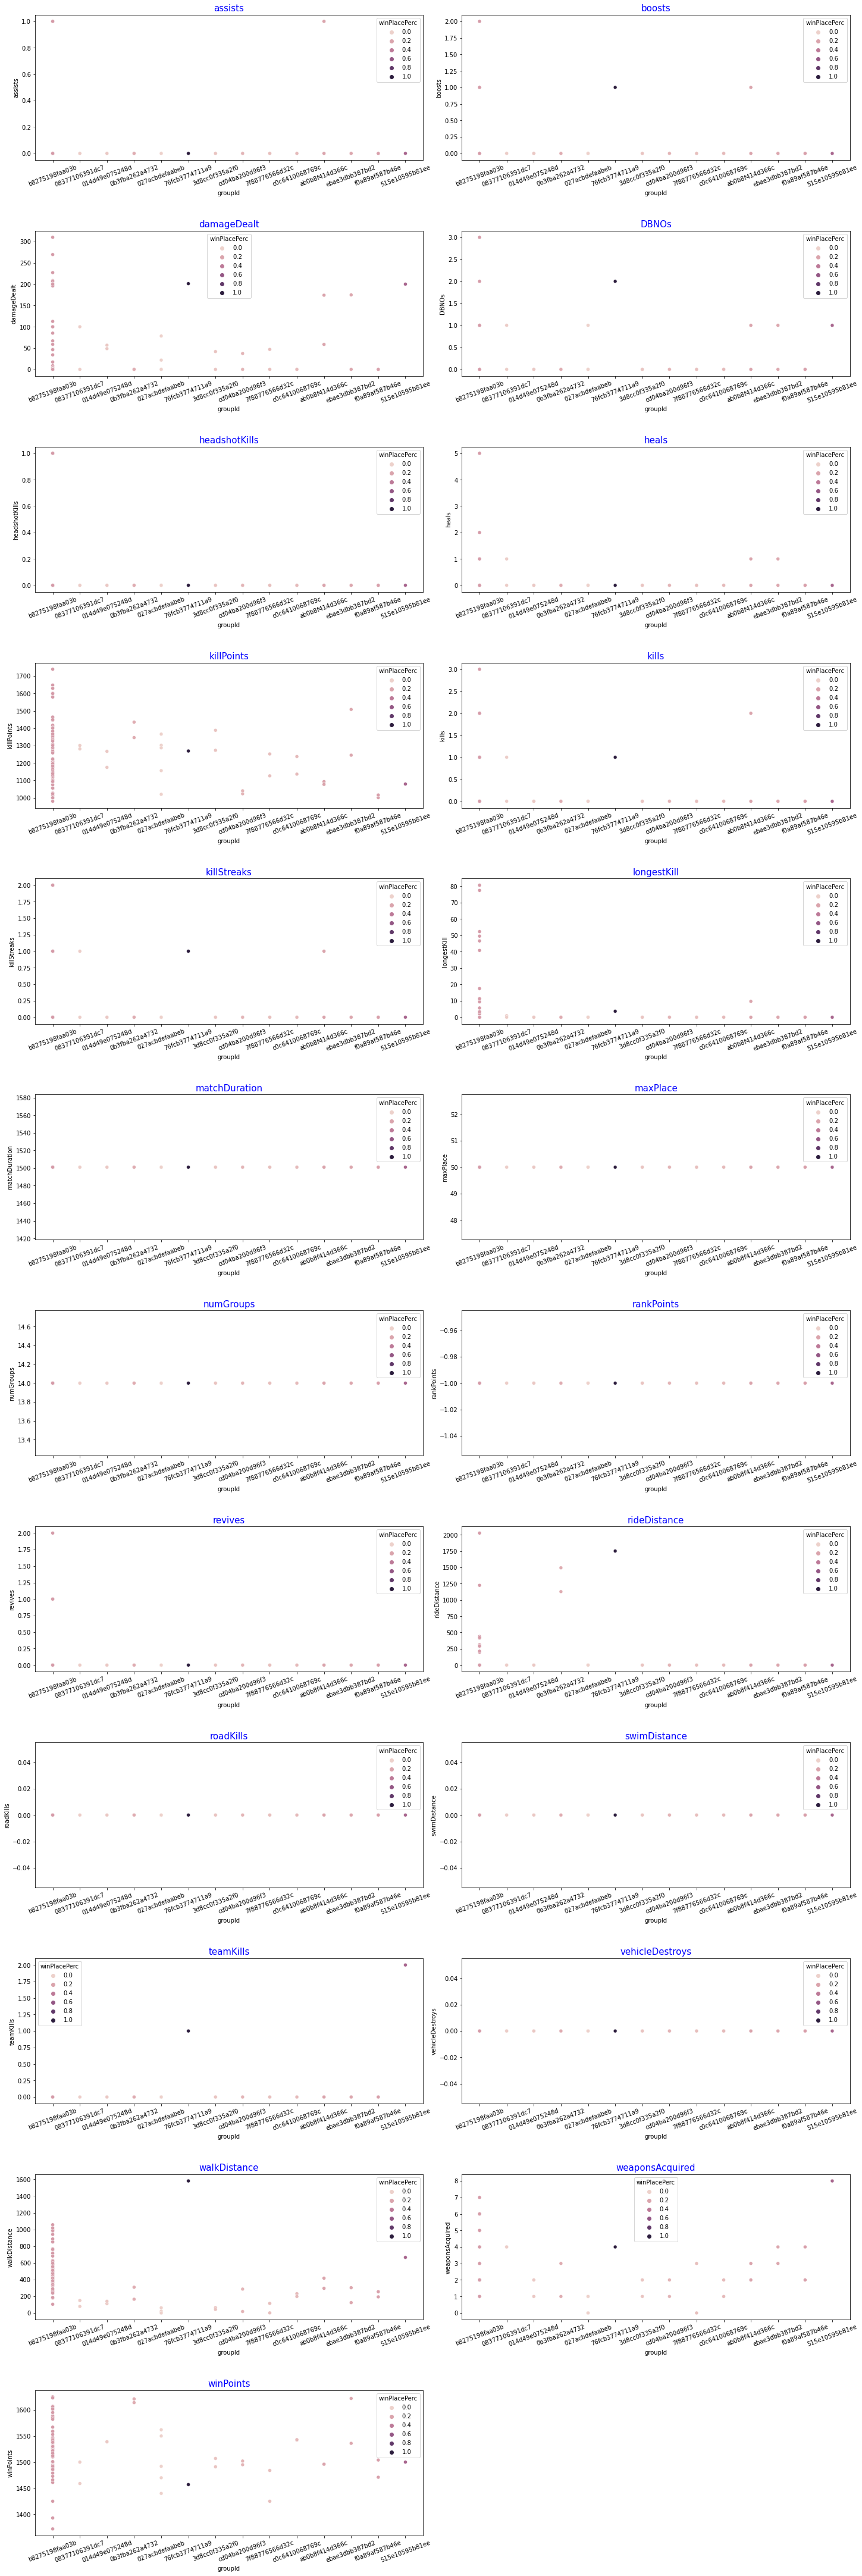

In [48]:
# 위의 데이터프레임을 시각화

fig = plt.figure(figsize=(20,60))

spec = grs.GridSpec(ncols=2, nrows=12)


for i in range(len(num_columns[:-1])):
    
    ax = fig.add_subplot(spec[i])
    plt.title(num_columns[i], )
    graph = sns.scatterplot(data=train_g4, x = 'groupId', y = num_columns[i], hue='winPlacePerc')
    plt.title(num_columns[i], fontsize=15, color='Blue')
    plt.xticks(rotation =20)
    spec.tight_layout(fig, h_pad=4, w_pad=0, pad = 0.25)
    
    
plt.show

In [49]:
# 특정 matchId에 대해 grouId 기준 정렬하여 조회
train_g5 = train_g[train_g['matchId']=='72fd23a75526c1'].sort_values('groupId')
train_g5

Id         groupId         matchId  assists  boosts  \
886904   1d6644122464d8  12935e5eb2cb46  72fd23a75526c1        0       0   
3225857  6e73ef7d67b8cd  12935e5eb2cb46  72fd23a75526c1        0       3   
1722138  2db5c57f8b89aa  12935e5eb2cb46  72fd23a75526c1        1       2   
3448484  51e7e0c2c6bcd1  1aa1704ac87cbc  72fd23a75526c1        0       0   
1362509  5887ed0b429874  1aa1704ac87cbc  72fd23a75526c1        0       0   
...                 ...             ...             ...      ...     ...   
1971448  007be1a27a9adb  e10665b3de04f9  72fd23a75526c1        0       0   
1092373  d73be7060ed917  f054abef71aa21  72fd23a75526c1        0       0   
208472   4f3f66770c8442  f054abef71aa21  72fd23a75526c1        0       3   
1301527  72815f121a7ba7  f054abef71aa21  72fd23a75526c1        0       2   
1967375  cb99341fe58ac3  fd745a398fbe2b  72fd23a75526c1        0       4   

         damageDealt  DBNOs  headshotKills  heals  killPoints  kills  \
886904       32.3125      1              0      0           0      2   
3225857     180.0000      1              1      1           0      1   
1722138     433.5000      4              0      1           0      3   
3448484       0.0000      0              0      0           0      0   
1362509       0.0000      0              0      0           0      0   
...              ...    ...            ...    ...         ...    ...   
1971448       0.0000      0              0      1           0      0   
1092373      25.7969      0              0      0           0      0   
208472      277.2500      2              1      4           0      2   
1301527      48.5625      1              0      5           0      1   
1967375       0.0000      0              0      2           0      0   

         killStreaks  longestKill  matchDuration matchType  maxPlace  \
886904             1      42.8438           1375     squad        27   
3225857            1       0.9399           1375     squad        27   
1722138            1      88.8125           1375     squad        27   
3448484            0       0.0000           1375     squad        27   
1362509            0       0.0000           1375     squad        27   
...              ...          ...            ...       ...       ...   
1971448            0       0.0000           1375     squad        27   
1092373            0       0.0000           1375     squad        27   
208472             2      74.5000           1375     squad        27   
1301527            1      13.1797           1375     squad        27   
1967375            0       0.0000           1375     squad        27   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
886904          26        1421        1        0.0000          0   
3225857         26        1433        0        0.0000          0   
1722138         26        1345        0        0.0000          0   
3448484         26        1523        0        0.0000          0   
1362509         26        1311        0        0.0000          0   
...            ...         ...      ...           ...        ...   
1971448         26        1485        0        0.0000          0   
1092373         26        1500        0        0.0000          0   
208472          26        1624        0        0.0000          0   
1301527         26        1379        0        0.0000          0   
1967375         26        1464        0        0.0000          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
886904         0.0000          0                0      555.0000   
3225857        0.0000          0                0      363.5000   
1722138        0.0000          0                0      647.5000   
3448484        0.0000          0                0        2.0566   
1362509        0.0000          0                0       25.4219   
...               ...        ...              ...           ...   
1971448        0.0000          0                0      899.0000   
1092373        0.0000    

groupId가 동일한 경우, winPlacePerc 값이 동일한 것을 발견하였음.

In [50]:
# 위의 테이블에서 특정 groupId에 대한 데이터 조회
train_g5[train_g5['groupId']=='a4606849d1bf59']

Id         groupId         matchId  assists  boosts  \
4250256  b5a9e7fa7da984  a4606849d1bf59  72fd23a75526c1        0       0   
4429949  12fae4a8cb6c74  a4606849d1bf59  72fd23a75526c1        2       2   
1631272  362677a98276c3  a4606849d1bf59  72fd23a75526c1        0       2   

         damageDealt  DBNOs  headshotKills  heals  killPoints  kills  \
4250256       0.0000      0              0      0           0      0   
4429949     219.2500      0              1      1           0      1   
1631272     208.7500      2              1      1           0      2   

         killStreaks  longestKill  matchDuration matchType  maxPlace  \
4250256            0       0.0000           1375     squad        27   
4429949            1      11.8594           1375     squad        27   
1631272            1      78.2500           1375     squad        27   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
4250256         26        1440        0        0.0000          0   
4429949         26        1454        0        0.0000          0   
1631272         26        1435        0        0.0000          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
4250256        0.0000          0                0       32.5000   
4429949        0.0000          0                0     2352.0000   
1631272        0.0000          0                0     2848.0000   

         weaponsAcquired  winPoints  winPlacePerc  groupcnt      mode  
4250256                1          0        0.7690         3  standard  
4429949                6          0        0.7690         3  standard  
1631272                7          0        0.7690         3  standard

한 그룹 내에서 winPlacePerc를 제외한 데이터가 팀의 등수에 주는 영향을 최소화 할 수 있는 방법에 대해 고민해보았음.
이를 해결하기 위해, winPlacePerc를 제외한 나머지 데이터를 팀 단위로 일원화시켜 모델을 학습시키면 될 것으로 판단.

In [ ]:
# groupId별로 그룹화 하여 수치형 컬럼들에 대해 각 그룹의 평균값으로 데이터를 변경
train01=train.copy()
train02= train01.groupby(['groupId'])[num_columns[:-1]].agg('mean').reset_index()
train03=train01[['groupId','winPlacePerc']]
train03=pd.merge(train03,train02,how='left',on='groupId')
train03

In [ ]:
# 위에서 조회한 특정 groupId에 대한 데이터를 다시 조회
train03[train03['groupId']=='a4606849d1bf59']

## **<span style="color: #B8860B">Preprocessing</span>**

EDA 과정을 거쳐 확정된 전처리 과정을 순서대로 정리

0. train 데이터 로드

In [ ]:
train = pd.read_csv(base_path + 'train_V2.csv')

1. 결측치 제거

In [ ]:
train = train.dropna()

2. killPlace column 제거
    - Data Leakage issue

In [ ]:
train = train.drop(columns='killPlace')

3. 한 게임 내에서 등수의 개수가 5개 미만인 데이터 제거

In [ ]:
# matchId 기준 winPlacePerc의 unique가 5개 미만인 게임의 데이터 drop

indexs = train.groupby('matchId')['winPlacePerc'].nunique().loc[train.groupby('matchId')['winPlacePerc'].nunique()<5].index
for idx in indexs:
    i = train[train['matchId']==idx].index
    train = train.drop(index=i, axis=0)

4. 그룹 구성원의 수가 가장 많은 상위 4개의 게임에 대해 데이터 제거

In [ ]:
# groupid unique가 가장 큰 상위 4개의 groupId가 포함된 matchId에 대해, 해당 게임의 데이터 drop
drop_list = ['3e029737889ce9', '41a634f62f86b7', '7e93ce71ac6f61', '701c7251415d15']
train = train.drop(index=train[train['matchId'].isin(drop_list)].index, axis=0)

5. matchType column의 데이터를 수치형으로 변환 : LabelEncoding

In [ ]:
le = LabelEncoder()
train['matchType']=le.fit_transform(train['matchType'])

6. 동일 그룹에 대해 모든 수치형 데이터를 평균화
    - groupId를 제외한 objective columns 제거 작업도 포함

In [ ]:
# groupId별로 그룹화 하여 수치형 컬럼들에 대해 각 그룹의 평균값으로 데이터를 변경
train01=train.copy()
train02= train01.groupby(['groupId'])[num_columns[:-1]].agg('mean').reset_index()
train03=train01[['groupId','winPlacePerc']]
train=pd.merge(train03,train02,how='left',on='groupId')
train

7. groupId column 데이터 제거

In [ ]:
train = train.drop(columns='groupId')

8. 작업이 완료된 데이터프레임을 csv 파일로 저장

In [ ]:
train.to_csv(base_path + 'train_preprocessed.csv', index = False)